**Objective :** The objective of this project is to conduct a comprehensive Exploratory Data Analysis (EDA) on the dataset released by Aspiring Minds, focusing on the employment outcomes of engineering graduates.




**Data Description :**

•	ID : A unique ID to identify a candidate

•	Salary : Annual CTC oﬀered to the candidate (in INR)

•	DOJ : Date of joining the company

•	DOL : Date of leaving the company

•	Designation : Designation oﬀered in the job

•	JobCity : Location of the job (city)

•	Gender : Candidate’s gender

•	DOB : Date of birth of candidate

•	10percentage : Overall marks obtained in grade 10 examinations

•	10board : The school board whose curriculum the candidate followed in grade 10

•	12graduation : Year of graduation - senior year high school

•	12percentage : Overall marks obtained in grade 12 examinations

•	12board : The school board whose curriculum the candidate followed in grade 12

•	CollegeID : Unique ID identifying the college which the candidate attended

•	CollegeTier : Tier of college

•	Degree : Degree obtained/pursued by the candidate

•	Specialization : Specialization pursued by the candidate

•	CollegeGPA : Aggregate GPA at graduation

•	CollegeCityID : A unique ID to identify the city in which the college is located in

•	CollegeCityTier : The tier of the city in which the college is located

•	CollegeState  : Name of States

•	GraduationYear :Year of graduation (Bachelor’s degree)

•	English : Scores in AMCAT English section

•	Logical : Scores in AMCAT Logical section

•	Quant : Scores in AMCAT Quantitative section

•	Domain : Scores in AMCAT’s domain module

•	ComputerProgramming : Score in AMCAT’s Computer programming section

•	ElectronicsAndSemicon : Score in AMCAT’s Electronics & Semiconductor Engineering section

•	ComputerScience : Score in AMCAT’s Computer Science section

•	MechanicalEngg : Score in AMCAT’s Mechanical Engineering section

•	ElectricalEngg : Score in AMCAT’s Electrical Engineering section

•	TelecomEngg : Score in AMCAT’s Telecommunication Engineering section

•	CivilEngg : Score in AMCAT’s Civil Engineering section

•	conscientiousness : Scores in one of the sections of AMCAT’s personality test

•	agreeableness : Scores in one of the sections of AMCAT’s personality test

•	extraversion : Scores in one of the sections of AMCAT’s personality test

•	neuroticism : Scores in one of the sections of AMCAT’s personality test

•	openess_to_experience : Scores in one of the sections of AMCAT’s personality test










In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [482]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [483]:
df = pd.read_csv('/content/drive/MyDrive/AMCAT Data.csv')

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   category      
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   category      
 13  Deg

# Sanity Checks and Data Cleaning

In [484]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [485]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

The column 'unnamed' can be dropped as it is not significant for the analysis

In [486]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [487]:
df.shape

(3998, 38)

In [488]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [489]:
df.drop(['ID','CollegeID','CollegeCityID'], axis=1, inplace=True)

Since the aim of the analysis is to understand the employment outcomes of engineering graduates, the columns ID, CollegeID and CollegeCityID are not important. These can be dropped

**Checking for Data Irregularities and Missing Values**

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

**Observations :**
* The dataset consists of 38 columns and 3998 rows with no missing values.
* However, the columns for Date of Birth (DOB), Date of Joining (DOJ) and DOL (Date of Leaving) are currently of object type and should be converted to the Date type.
* The DOL (Date of Leaving) column contains non-datetime value; "present"
* The JobCity, Specialization, and Board of Examination columns have multiple redundant or inconsistent values.
* Several columns related to scores have '-1' values, indicating missing or erroneous data.
* The GraduationYear column has invalid entry '0'
* The JobCity column also includes an invalid value '-1'

In [491]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [492]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

In [493]:
categorical_variables = ['Designation','JobCity','Gender','10board','12board','CollegeTier','Degree','Specialization','CollegeCityTier','CollegeState']

for var in categorical_variables:
 df[var] = df[var].astype('category')

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   category      
 4   JobCity                3998 non-null   category      
 5   Gender                 3998 non-null   category      
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   category      
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   category      
 12  CollegeTier            3998 non-null   category      
 13  Deg

In [495]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999])

In [496]:
df['Gender'].unique()

['f', 'm']
Categories (2, object): ['f', 'm']

In [497]:
df['ComputerScience'].unique()

array([ -1, 407, 346, 376, 500, 438, 315, 253, 469, 192, 530, 284, 223,
       561, 684, 592, 623, 653, 130, 715])

In [498]:
df.isnull().sum()

,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0
12graduation,0


There are no missing values in any of the columns in the dataset.

**Statistical Summmary of Data**

In [499]:
df.describe()

,Salary,DOJ,DOB,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,71.486171,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,6.450000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,66.407500,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,71.720000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,76.327500,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,99.930000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,8.167338,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


We can observe some incorrect data entries in the 10, 12th and CollegeGPA columns. We must replace errorrenous data points with correct data.

In [500]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

df.loc[df['collegeGPA']<=10,'collegeGPA'].index
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100
df.head()

0
0
12


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Verifying the results to be in percentages

In [501]:
df[df.duplicated(keep=False)]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience



The data is clean and free of any duplicate entries.

In [502]:
df.nunique()

,0
Salary,177
DOJ,81
DOL,67
Designation,419
JobCity,339
Gender,2
DOB,1872
10percentage,851
10board,275
12graduation,16


In [503]:
from datetime import date

def calculate_age(born):
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(calculate_age)

Age column is generated to do further analysis of data

In [504]:
df['JobCity'].unique()

['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar', ..., 'Karad', 'Rajpura', 'Pilani', 'haryana', 'Asifabadbanglore']
Length: 339
Categories (339, object): [' Chennai', ' Delhi', ' Mumbai', ' Pune', ..., 'udaipur', 'vapi', 'vizag',
                           'vsakhapttnam']

In [505]:
df.loc[df['JobCity']== '-1']

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
15,350000.0,2013-08-01,present,network engineer,-1,f,1990-01-17,69.54,icse,2008,...,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528,34
21,200000.0,2012-08-01,12/1/13 0:00,software engineer,-1,f,1991-08-20,75.67,up,2007,...,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,33
39,200000.0,2013-01-01,6/1/13 0:00,management trainee,-1,m,1991-02-28,88.00,kerala state technical education,2008,...,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,33
77,120000.0,2014-07-01,present,test engineer,-1,m,1992-02-18,76.00,state board,2009,...,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776,32
79,100000.0,2013-08-01,5/1/14 0:00,software developer,-1,f,1992-05-17,86.00,state board,2009,...,-1,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,205000.0,2012-10-01,2/1/14 0:00,production engineer,-1,m,1991-01-13,84.80,cbse,2008,...,-1,-1,233,-1,0.1623,0.0328,-0.3440,-1.05410,0.5024,33
3942,280000.0,2013-07-01,present,software engineer,-1,m,1990-03-17,78.00,state board,2009,...,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.62890,-0.8608,34
3954,310000.0,2014-04-01,4/1/15 0:00,business intelligence analyst,-1,f,1992-11-15,88.40,ssc,2009,...,-1,-1,393,-1,0.8192,0.6568,0.9623,-0.29020,0.0679,31
3973,335000.0,2013-08-01,present,programmer analyst,-1,m,1990-05-20,66.85,state board,2008,...,-1,-1,-1,-1,0.2718,-0.1206,-1.2196,-0.36120,-0.6692,34


We can observe some inconsistent data points in the City column. Certain number of rows contain -1 as value for job city. This has to be replaced.The spelling errors can be addressed by leveraging fuzzywuzzy library.


In [506]:
df['JobCity'].replace(to_replace = '-1', value='Others/Remote Employee',inplace = True)

Those rwos where -1 was entered for Job City is now replaced with others or Remote Employee considering the possibility that the people are doing WFH

In [507]:
!pip install Levenshtein

In [508]:
!pip install fuzzywuzzy

In [509]:
import Levenshtein
import fuzzywuzzy
from fuzzywuzzy import process

In [510]:
values = df['JobCity'].unique().tolist()
values

['Bangalore',
 'Indore',
 'Chennai',
 'Gurgaon',
 'Manesar',
 'Hyderabad',
 'Banglore',
 'Noida',
 'Kolkata',
 'Pune',
 'Others/Remote Employee',
 'mohali',
 'Jhansi',
 'Delhi',
 'Hyderabad ',
 'Bangalore ',
 'noida',
 'delhi',
 'Bhubaneswar',
 'Navi Mumbai',
 'Mumbai',
 'New Delhi',
 'Mangalore',
 'Rewari',
 'Gaziabaad',
 'Bhiwadi',
 'Mysore',
 'Rajkot',
 'Greater Noida',
 'Jaipur',
 'noida ',
 'HYDERABAD',
 'mysore',
 'THANE',
 'Maharajganj',
 'Thiruvananthapuram',
 'Punchkula',
 'Bhubaneshwar',
 'Pune ',
 'coimbatore',
 'Dhanbad',
 'Lucknow',
 'Trivandrum',
 'kolkata',
 'mumbai',
 'Gandhi Nagar',
 'Una',
 'Daman and Diu',
 'chennai',
 'GURGOAN',
 'vsakhapttnam',
 'pune',
 'Nagpur',
 'Bhagalpur',
 'new delhi - jaisalmer',
 'Coimbatore',
 'Ahmedabad',
 'Kochi/Cochin',
 'Bankura',
 'Bengaluru',
 'Mysore ',
 'Kanpur ',
 'jaipur',
 'Gurgaon ',
 'bangalore',
 'CHENNAI',
 'Vijayawada',
 'Kochi',
 'Beawar',
 'Alwar',
 'NOIDA',
 'Greater noida',
 'Siliguri ',
 'raipur',
 'gurgaon',
 'Bhopal'

In [511]:
choices = ['Bangalore',
 ' ariyalur',
 ' Chennai',
 ' Delhi',
 ' Mumbai',
 ' Pune',
 'Agra',
 'Ahmedabad',
 'Ahmednagar',
 'Al Jubail,Saudi Arabia',
 'Allahabad',
 'Alwar',
 'Ambala',
 'angul',
 'Asansol',
 'Aurangabad',
 'Australia',
 'Baddi HP',
 'Bahadurgarh',
 'Bankura',
 'Bareli',
 'Baripada',
 'Baroda',
 'Bathinda',
 'Beawar',
 'Belgaum',
 'Bellary',
 'Bhagalpur',
 'Bharuch',
 'Bhilai',
 'Bhiwadi',
 'Bhopal',
 'Bhubaneshwar',
 'bihar',
 'Bikaner',
 'Bilaspur',
 'Bulandshahar',
 'Bundi',
 'Burdwan',
 'Calicut',
 'Chandigarh',
 'Chandrapur',
 'CHEYYAR',
 'Coimbatore',
 'Daman and Diu',
 'Dammam',
 'Dausa',
 'Dehradun',
 'Dhanbad',
 'Dharamshala',
 'Dharmapuri',
 'Dharuhera',
 'Dubai',
 'Durgapur',
 'Ernakulam',
 'Faridabad',
 'Gagret',
 'Gandhi Nagar',
 'Ganjam',
 'Ghaziabad',
 'Gonda',
 'Gorakhpur',
 'Gulbarga',
 'Gurgaon',
 'Guwahati',
 'Gwalior',
 'Haldia',
 'Haridwar',
 'haryana',
 'Hissar',
 'Hospete',
 'Howrah',
 'Hubli',
 'india',
 'Indore',
 'Jabalpur',
 'Jagdalpur',
 'Jaipur',
 'Jalandhar',
 'Jammu',
 'Jamnagar',
 'Jamshedpur',
 'Jaspur',
 'Jeddah Saudi Arabia',
 'Jhajjar',
 'Jhansi',
 'Jodhpur',
 'Johannesburg',
 'Joshimath',
 'Jowai',
 'kakinada',
 'kala amb ',
 'Kalmar, Sweden',
 'Kanpur',
 'Karad',
 'Karnal',
 'kharagpur',
 'Khopoli',
 'Kochi',
 'Kochi/Cochin',
 'Chennai and Coimbatore',
 'kolhapur',
 'Kolkata',
 'Kota',
 'kudankulam ,tarapur',
 'Kurnool',
 'latur (Maharashtra )',
 'LONDON',
 'Lucknow',
 'Ludhiana',
 'Madurai',
 'Maharajganj',
 'Mainpuri',
 'Manesar',
 'Meerut',
 'Mettur, Tamil Nadu ',
 'Miryalaguda',
 'Mohali',
 'Muvattupuzha',
 'Muzaffarnagar',
 'Muzaffarpur',
 'Mysore',
 'Nagari',
 'Nagpur',
 'Nalagarh',
 'Nanded',
 'Nashik',
 'ncr',
 'Neemrana',
 'Nellore',
 'Ongole',
 'orissa',
 'Others/Remote Employee',
 'Panchkula',
 'Pantnagar',
 'Patiala',
 'Patna',
 'Phagwara',
 'Pilani',
 'Pondicherry',
 'Punchkula',
 'Pune',
 'RAE BARELI',
 'Raigarh',
 'Raipur',
 'Rajasthan',
 'Rajkot',
 'Rajpura',
 'Ranchi',
 'RAS AL KHAIMAH',
 'Ratnagiri',
 'Rayagada, Odisha',
 'Rewari',
 'Rohtak',
 'Roorkee',
 'Rourkela',
 'Rudrapur',
 'SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN',
 'Sahibabad',
 'Salem',
 'Sambalpur',
 'sampla',
 'Secunderabad',
 'Shahdol',
 'shahibabad',
 'Shimla',
 'Siliguri',
 'singaruli',
 'Sonipat',
 'Surat',
 'Thane',
 'Thiruvananthapuram',
 'Tirunelvelli',
 'Tirupati',
 'Tornagallu',
 'Trichur',
 'Trichy',
 'Trivandrum',
 'Udaipur',
 'Una',
 'Unnao',
 'Vadodara',
 'Vandavasi',
 'vapi',
 'Varanasi',
 'Vellore',
 'Vijayawada',
 'Visakhapatnam',
 'Vizag',
 'Yamuna Nagar']

In [512]:
from fuzzywuzzy import process
def correct_spelling_errors(target_word, choices, threshold=80):
    match , score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word
df[ 'JobCities'] = df[ 'JobCity' ].apply(lambda x : correct_spelling_errors(str(x), choices=choices))

In [513]:
df['JobCities'].nunique()

214

In [514]:
df[df['GraduationYear']==0]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
2664,325000.0,2014-07-01,7/1/15 0:00,systems engineer,Chandigarh,m,1991-12-17,89.0,cbse,2010,...,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,32,Chandigarh


Replacing the missing Graduation year with appropriate value

In [515]:
df['GraduationYear'].replace(to_replace = 0, value=2014,inplace = True)

In [516]:
df['Specialization'].unique()

['computer engineering', 'electronics and communication engineering', 'information technology', 'computer science & engineering', 'mechanical engineering', ..., 'internal combustion engine', 'computer networking', 'biomedical engineering', 'electronics', 'computer science']
Length: 46
Categories (46, object): ['aeronautical engineering', 'applied electronics and instrumentation',
                          'automobile/automotive engineering', 'biomedical engineering', ..., 'other',
                          'polymer technology', 'power systems and automation',
                          'telecommunication engineering']

In [517]:
Domains={'computer engineering':'CE','electronics and communication engineering':'ECE',
 'information technology':'IT','computer science & engineering':'CSE','mechanical engineering':'ME',
 'electronics and electrical engineering':'EEE',
 'computer networking':'CN','biomedical engineering':'BE'}

df['Specialization'].replace(Domains,inplace=True)
df['Specialization'].unique()

['CE', 'ECE', 'IT', 'CSE', 'ME', ..., 'internal combustion engine', 'CN', 'BE', 'electronics', 'computer science']
Length: 46
Categories (46, object): ['aeronautical engineering', 'applied electronics and instrumentation',
                          'automobile/automotive engineering', 'BE', ..., 'other', 'polymer technology',
                          'power systems and automation', 'telecommunication engineering']

Assigning appropriate abbreviations to the Spelization columns to adddress the inconsistencies present in the entries. This ensures accurate analysis

In [518]:
print((df==0).sum()[(df==0).sum() > 0])

CollegeCityTier    2797
dtype: int64


The CollegeCityTier column contains 2797 '0' entries

In [519]:
print((df==-1).sum()[(df==-1).sum()>0]/len(df)*100)

Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64


In the departments 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg' and
'CivilEngg more than 94 percent of appropriate data is missing. We shall drop these columns as attempting to replace these values will create bias.

In [520]:
df = df.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
'CivilEngg'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,34,Indore
2,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,34,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar


In [521]:
df['10board'] = df['10board'].astype(str)
df['12board'] = df['12board'].astype(str)
df['JobCity'] = df['JobCity'].astype(str)

In [522]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})

In [523]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,34,Indore
2,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,34,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,2011-10-01,10/1/12 0:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,37,Delhi
3994,100000.0,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,325.0,420,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,32,Hyderabad
3995,320000.0,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,33,Bangalore
3996,200000.0,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,32,Bangalore


In the categorical columns, the missing values are replaced nby their respective modes.

In [524]:
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace= True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,34,Indore
2,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,34,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar


In [525]:
df['Domain']

,Domain
0,0.635979
1,0.960603
2,0.450877
3,0.974396
4,0.124502
...,...
3993,0.276047
3994,0.881620
3995,0.488348
3996,0.744758


Now, the categorical columns containing text can be further cleaned by removing any extra leading or trailing spaces and alphabet case

In [526]:
# Cleaning text data in columns
def cleaning_text_data(data):
  df[data] = df[data].str.lower().str.strip()
cat_columns =['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [527]:
for col in cat_columns:
 cleaning_text_data(col)

In [528]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,34,Indore
2,325000.0,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,34,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,manesar,m,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar


In [529]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = 2024 - df['DOB'].dt.year
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,35,Indore
2,325000.0,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,35,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,manesar,m,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar


# **Exploratory Data Analysis**

# Univariate Analysis

In [530]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
0,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34,Bangalore
1,500000.0,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,35,Indore
2,325000.0,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32,Chennai
3,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,35,Gurgaon
4,200000.0,2014-03-01,3/1/15 0:00,get,manesar,m,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33,Manesar


In [531]:
num_columns = ['Salary','10percentage','12percentage','English','Logical','Quant','Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience',
           'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','Age']

In [532]:
df['10percentage'].max()

97.76

In [533]:
df['12percentage'].max()

98.7

In [534]:
df['Age'].max()

47

**Salary**

In [535]:
df['Salary'].nunique()

177

In [536]:
df['Salary'].max()

4000000.0

In [537]:
df['Salary'].min()

35000.0

In [538]:
df['Salary'].mean()

307699.8499249625

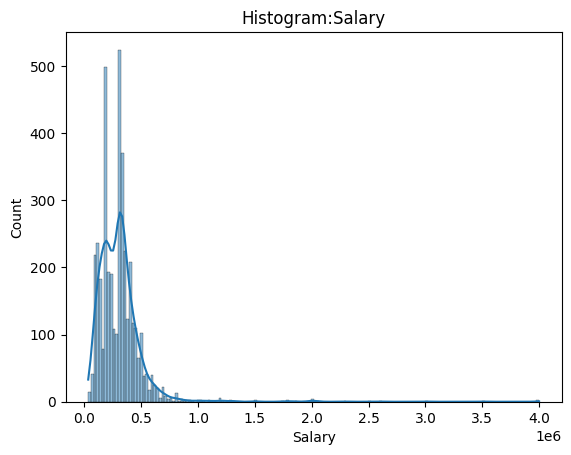

In [539]:
plt.title('Histogram:Salary')
sns.histplot(data = df, x='Salary', kde = True)
plt.show()

In [540]:
# Calculating quartiles
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

print(f"25th percentile (Q1): ₹{Q1}")
print(f"75th percentile (Q3): ₹{Q3}")
print(f"Interquartile Range (IQR): ₹{IQR}")

25th percentile (Q1): ₹180000.0
75th percentile (Q3): ₹370000.0
Interquartile Range (IQR): ₹190000.0


 **Observations :**
 1. Multi-modal Distribution: The histogram shows multiple peaks, suggesting that the 'Salary' variable may represent several different groups or populations within the data.
 2. Extremely right skewed: The distribution is right-skewed, with a tail extending towards higher salary values. Most of the data is concentrated in the lower salary range, with fewer instances of very high salaries. With one outlier being as high salary as 4000000 rupees.
 3. High Frequency at Lower Range: There is a significant spike at the lower end of the salary range, which could indicate a large number of entries at a minimum or starting salary level.

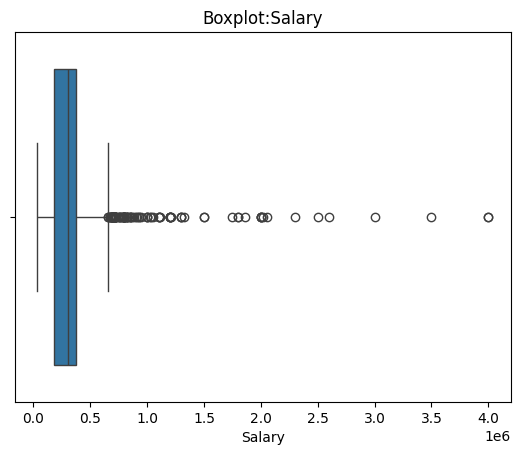

In [541]:
plt.title('Boxplot:Salary')
sns.boxplot(data = df, x = 'Salary')
plt.show()

1. Outliers or Extreme Values: There are a datapoints at the far right of the boxplot, indicating the presence of outliers or extremely high salaries compared to the rest of the data.
2. Salary Range and Recruitment: The right skew suggests that while a large segment of the population earns within a modest salary range, there are opportunities for significantly higher earnings within the dataset. This could be relevant for job seekers.

**College Tier**

In [542]:
df['CollegeTier'].unique()

[2, 1]
Categories (2, int64): [1, 2]

In [543]:
df['CollegeTier'].mode()

,CollegeTier
0,2


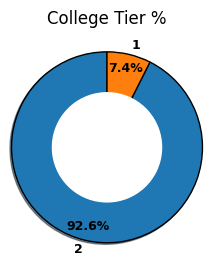

In [544]:
plt.figure(figsize=(3,3))
plt.pie(df['CollegeTier'].value_counts().tolist(), labels = df['CollegeTier'].value_counts().index,
autopct = '%1.1f%%',
radius = 1.75,
wedgeprops = {'edgecolor':'k'},
textprops = {'fontsize':9,'fontweight':'bold'},
shadow = True,
startangle = 90,
pctdistance = 0.85)
plt.pie(df['CollegeTier'].value_counts().tolist(), colors = ['white'],
wedgeprops = {'edgecolor':'white'},
radius = 1)
plt.title('College Tier %',pad = 40, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

Most of the colleges lie in the 2nd Tier with 92.6%

**Designation**

In [545]:
# The dataset is crowded with n no. of positions. Therefore, we can select the top ten categories and labeling the rest as other.
# This is to carry out the analysis and find actionable insights.
def collapsing_categories(df, data):
    for Designation in df[data].unique():
        min_count = df[data].value_counts()[:10].min()
        if df[df[data] == Designation][data].value_counts()[0] < min_count:
            df.loc[df[data] == Designation, data] = 'other'

In [546]:
for cols in cat_columns:
 collapsing_categories(df, cols)

In [547]:
df['Designation'].nunique()

11

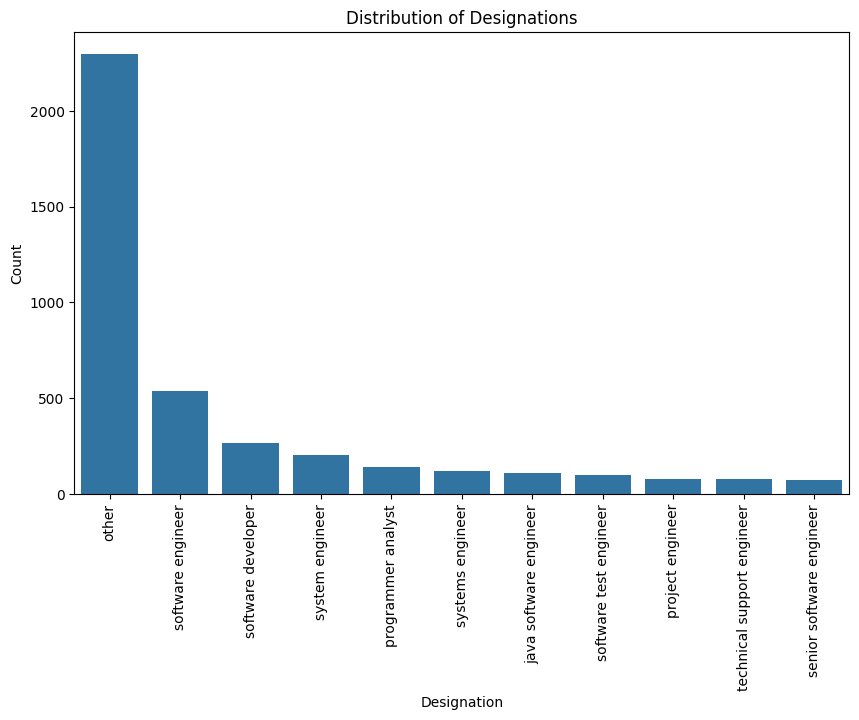

In [548]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Designation', data=df, order=df['Designation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.show()

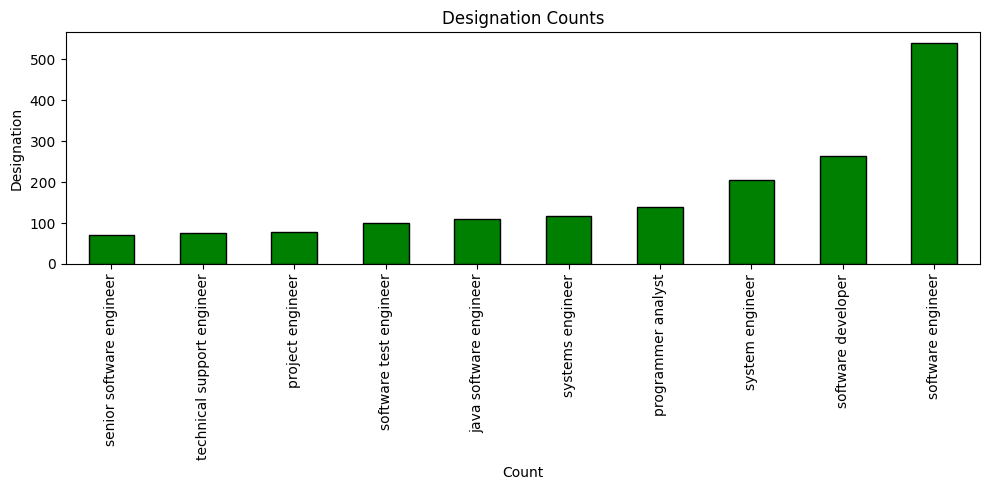

In [549]:
df['Designation'].value_counts()[1:].sort_values(ascending=True).plot(
kind='bar',
title='Designation Counts',
figsize=(10, 5),
ec='k',color = 'green')
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

The most common designation is Software Engineer followed by Software Developer.

**Degree**

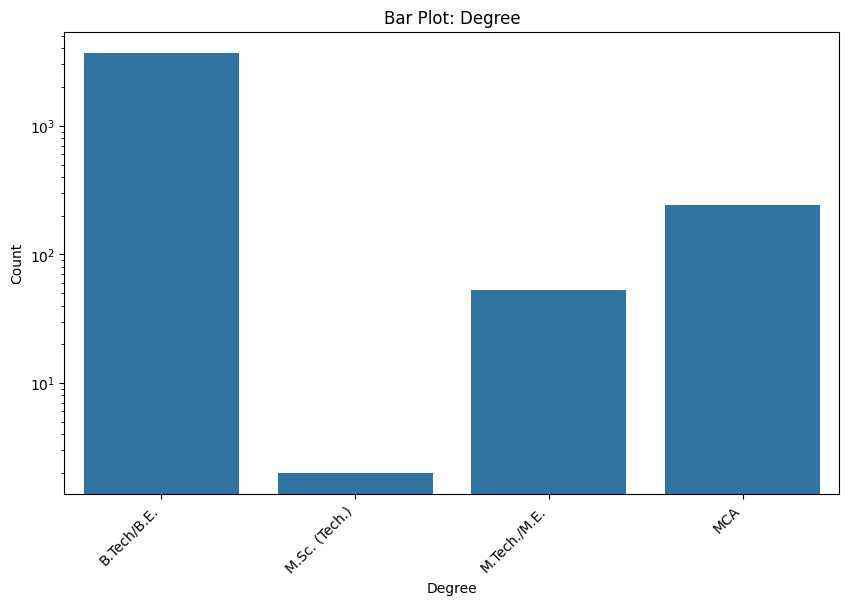

In [550]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Degree')
plt.title('Bar Plot: Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()

Few students hold an M.Sc. in technology, with the majority of graduates having completed their B.Tech degrees, followed by MCA graduates.

**Gender**

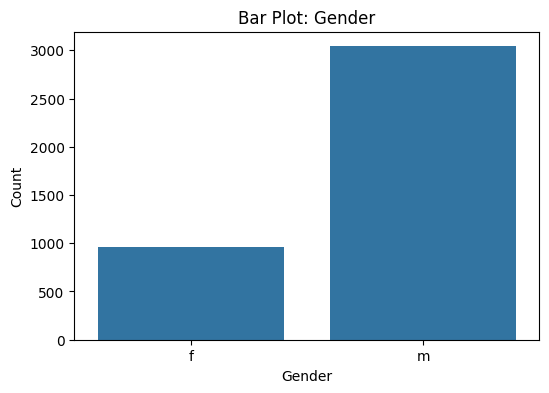

In [551]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Bar Plot: Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There is an imbalance in the dataset with male datapoints being significantly higher than the females.

**JobCity**

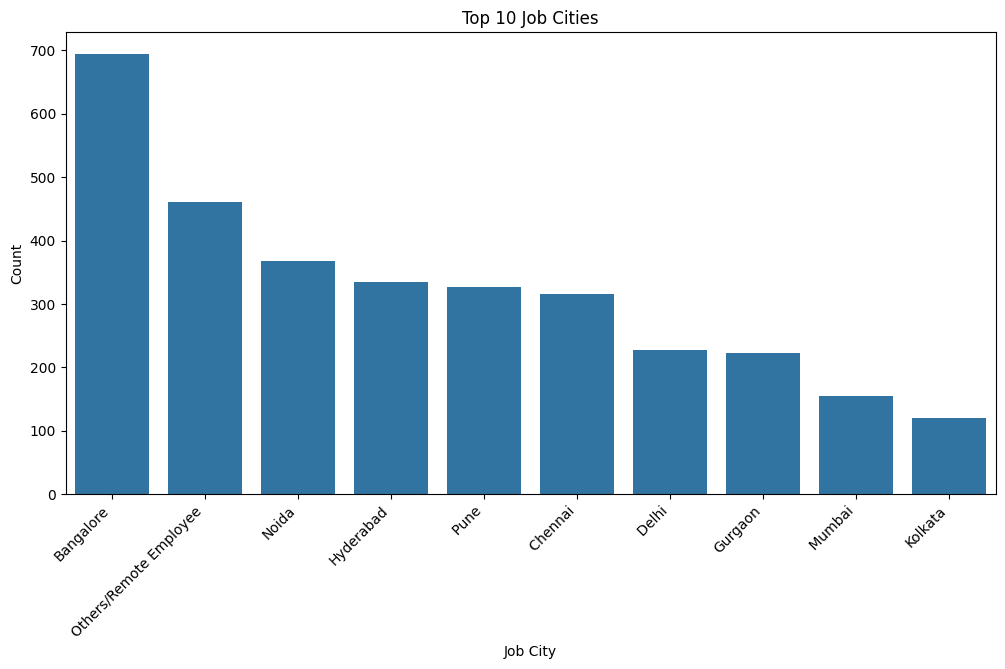

In [552]:
top_10_jobcities = df['JobCities'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_jobcities.index, y=top_10_jobcities.values)
plt.title('Top 10 Job Cities')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Bangalore is the city with most of the students placed and Kolkata has the least placements.

**CollegeTierCity**

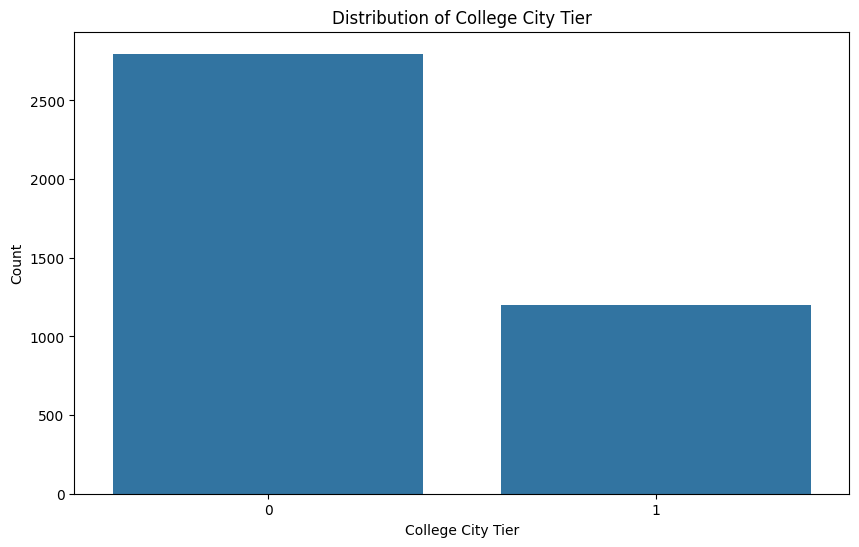

In [553]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CollegeCityTier', data=df)
plt.title('Distribution of College City Tier')
plt.xlabel('College City Tier')
plt.ylabel('Count')
plt.show()

Majority of colleges are in Tier 0 City

**10th and 12th Boards**

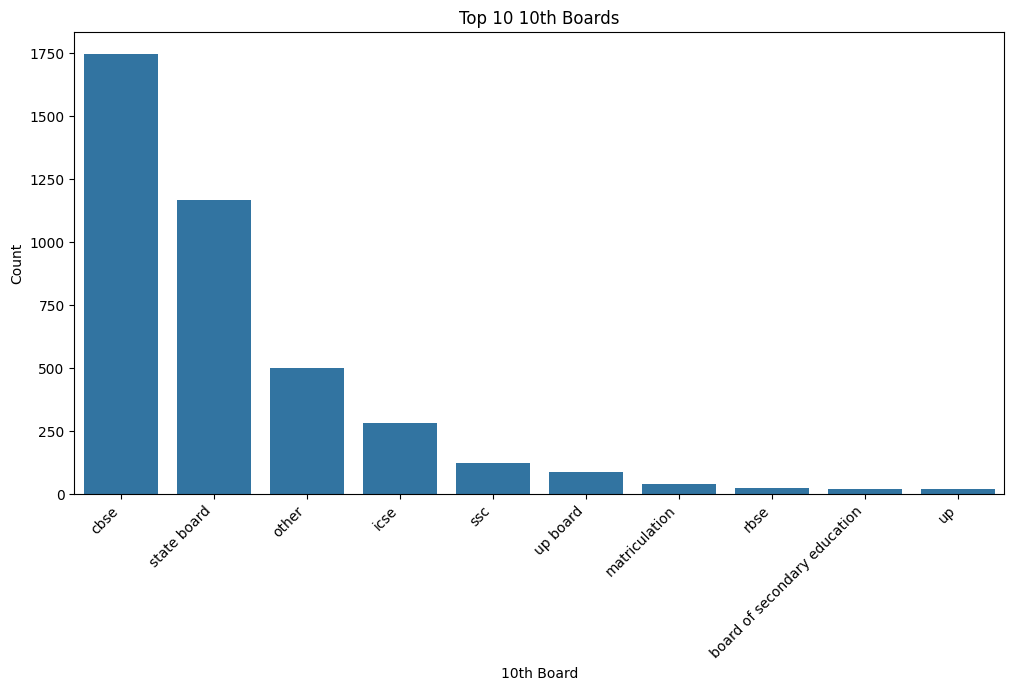

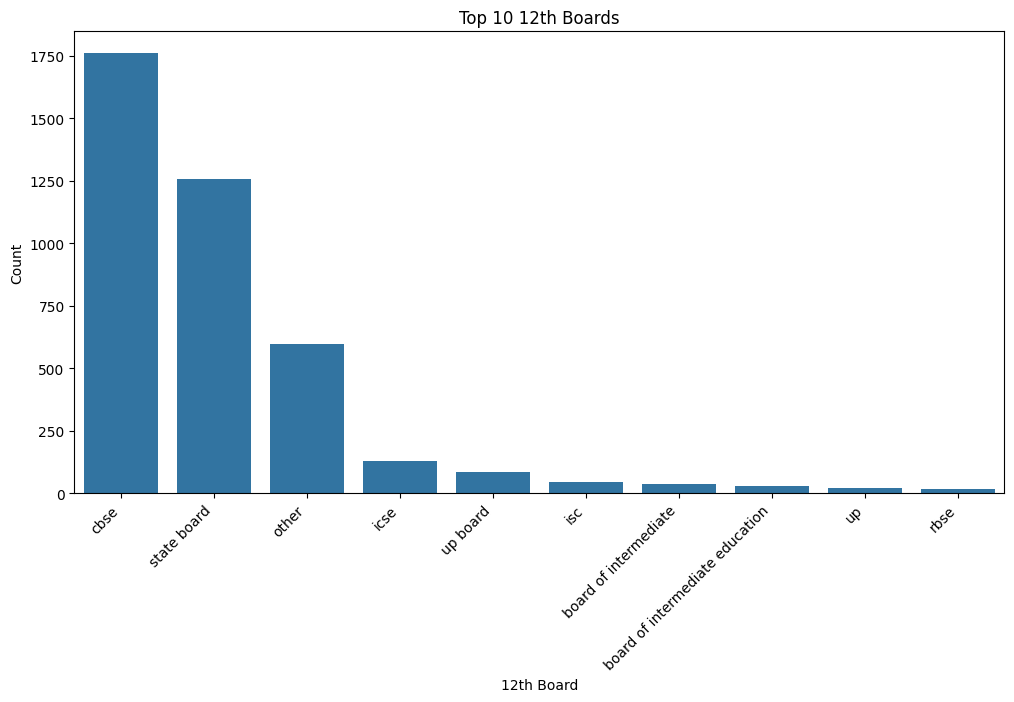

In [554]:
plt.figure(figsize=(12, 6))
sns.countplot(x='10board', data=df, order=df['10board'].value_counts().iloc[:10].index)
plt.title('Top 10 10th Boards')
plt.xlabel('10th Board')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='12board', data=df, order=df['12board'].value_counts().iloc[:10].index)
plt.title('Top 10 12th Boards')
plt.xlabel('12th Board')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


CBSE is the most common board for both grade 10 and 12

**GraduationYear**

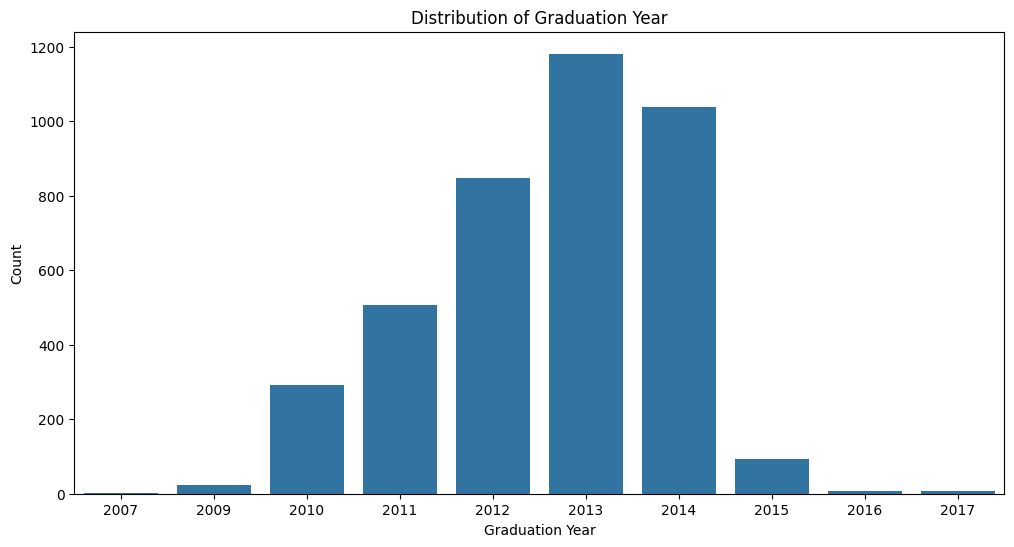

In [555]:
# prompt: graph for graduation year

plt.figure(figsize=(12, 6))
sns.countplot(x='GraduationYear', data=df)
plt.title('Distribution of Graduation Year')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.show()


Most of the Students in the Dataset were graduated in the year 2013 followed by 2014. Least year being 2007

**10thpercentage**

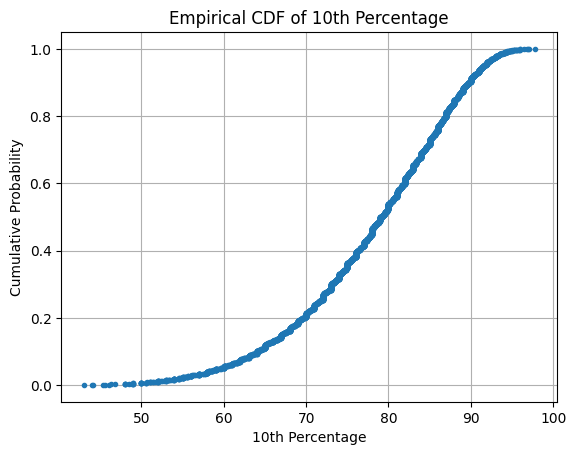

In [556]:
data = df['10percentage']

n = len(data)
x = np.sort(data)
y = np.arange(1, n + 1) / n

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('10th Percentage')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of 10th Percentage')
plt.grid(True)
plt.show()

**Observations:**
1. Distribution Spread: Most of the students' scores are spread between 50 and 95, with the bulk concentrated above 70.
2. High Achievers: The sharp rise towards the end of the curve indicates a significant number of high achievers, as a large proportion of students have scores near the maximum of 100.
3. Lower Scores Are Rare: The initial flat region of the CDF indicates that lower scores (below 50) are relatively rare among the students.

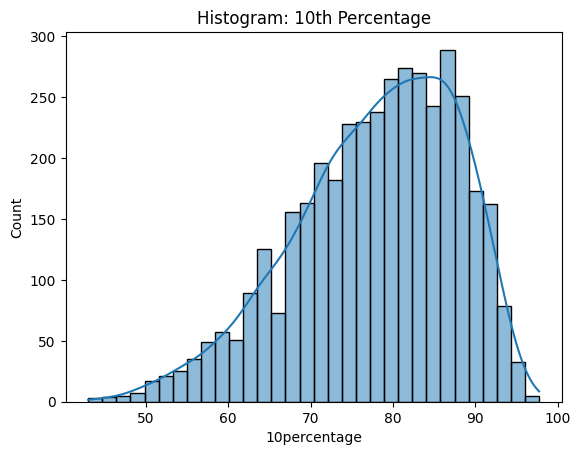

In [557]:
plt.title('Histogram: 10th Percentage')
sns.histplot(data=df, x='10percentage', kde=True)
plt.show()

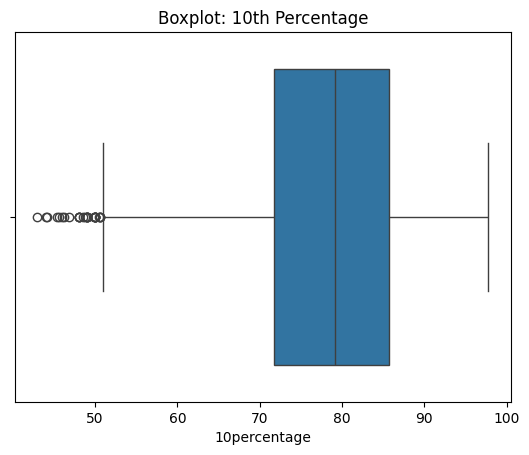

In [558]:
plt.title('Boxplot: 10th Percentage')
sns.boxplot(data=df, x='10percentage')
plt.show()

**12percentage**

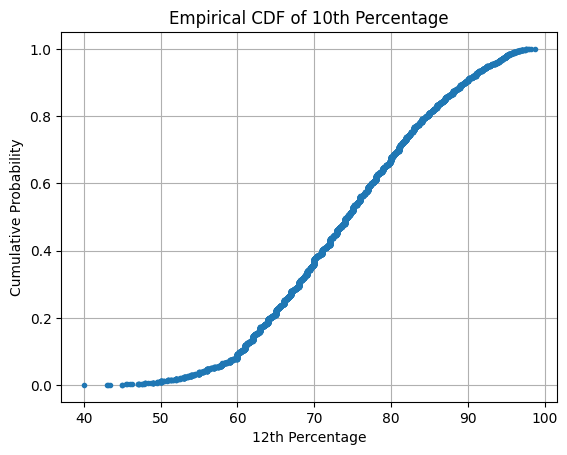

In [559]:
data = df['12percentage']

n = len(data)
x = np.sort(data)
y = np.arange(1, n + 1) / n

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('12th Percentage')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of 10th Percentage')
plt.grid(True)
plt.show()

**Observations:**
1. Middle Range Concentration: Most students scored between 50% and 90%, with a significant concentration in the middle of this range.
2. High Achievers Prevalence: The steeper section towards the end of the curve signifies a higher concentration of students scoring between 80% and 95%, indicating a prevalence of high achievers.
3. Low Scores Uncommon: The initial flat section of the curve indicates that lower scores (below 50%) are quite uncommon, suggesting a general trend of higher academic achievement among the students in 12th grade.
4. Distribution Characteristics: The shape of the curve suggests a normal-like distribution, albeit slightly skewed towards higher scores, which is typical for academic performance distributions where failing scores are less common.

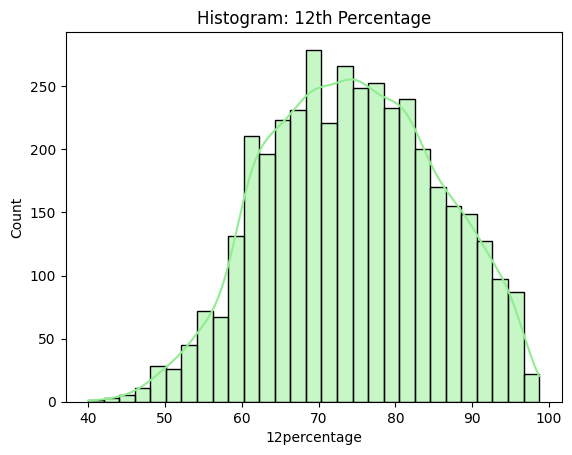

In [599]:
plt.title('Histogram: 12th Percentage')
sns.histplot(data=df, x='12percentage', kde=True, color = 'lightgreen')
plt.show()

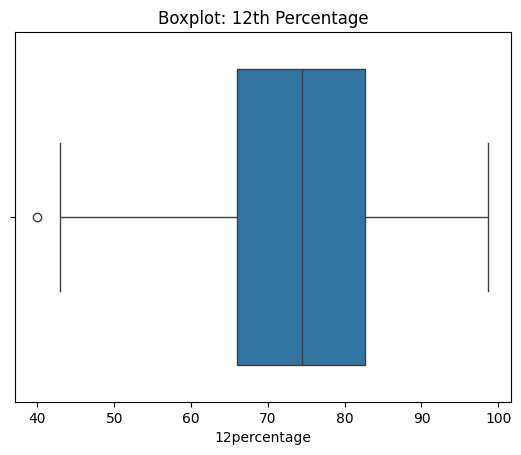

In [561]:
plt.title('Boxplot: 12th Percentage')
sns.boxplot(data=df, x='12percentage')
plt.show()

**CollegeGPA**

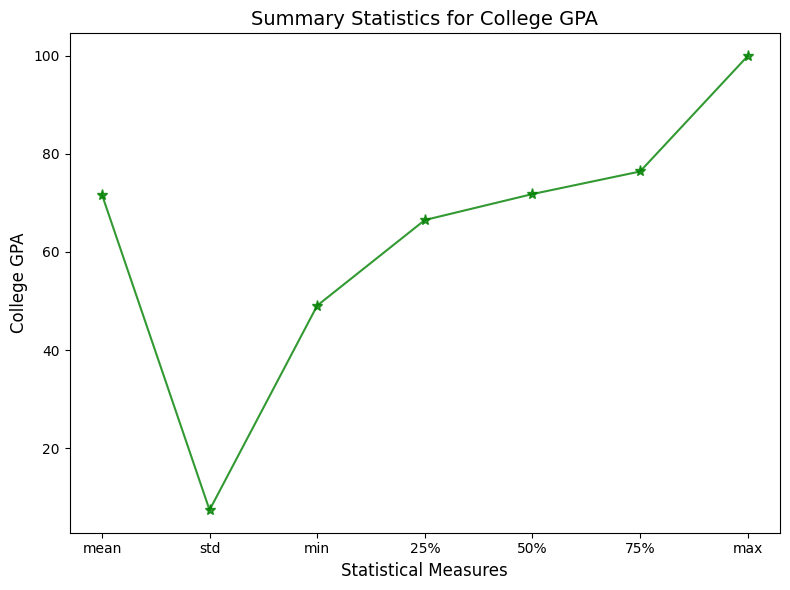

In [562]:
plt.figure(figsize=(8, 6))
df['collegeGPA'].describe()[1:].plot(marker='*', markersize=8, color='green', alpha=0.8)
plt.title('Summary Statistics for College GPA', fontsize=14)
plt.xlabel('Statistical Measures', fontsize=12)
plt.ylabel('College GPA', fontsize=12)
plt.tight_layout()
plt.show()

**Observations:**
1. Distribution Spread: The high standard deviation relative to the mean indicates a wide spread in the GPAs, implying diverse academic outcomes among the students.
2. Performance Levels: The significant difference between the minimum and the lower quartile suggests that while most students perform moderately to well, there are outliers with very low GPAs.
3. Symmetry in Distribution: The close values of the mean and median suggest that the GPA distribution might be roughly symmetric, but the presence of outliers, especially on the lower end, could be skewing the distribution slightly.
4. High Achievers: The high maximum value shows that there are students performing exceptionally well, though they are not numerous enough to shift the overall average significantly higher.

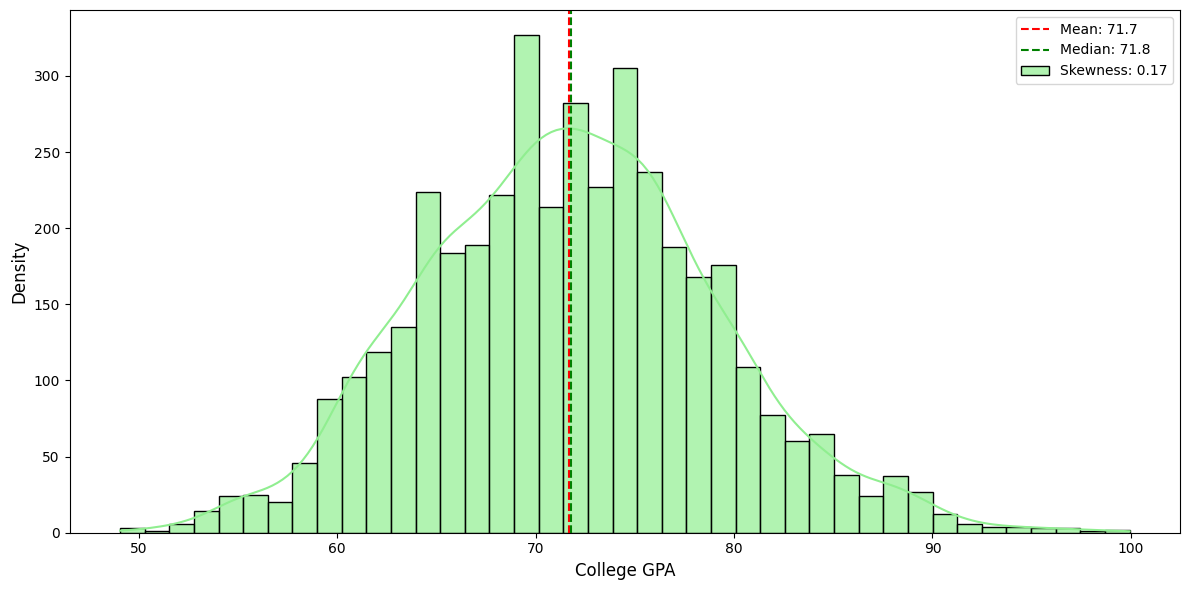

In [563]:
plt.figure(figsize=(12, 6))
sns.histplot(df['collegeGPA'], bins='auto', color='lightgreen', alpha=0.7, kde=True, label=f"Skewness: {round(df['collegeGPA'].skew(), 2)}")
plt.axvline(df['collegeGPA'].mean(), color='red', linestyle='--', label=f"Mean: {round(df['collegeGPA'].mean(), 2)}")
plt.axvline(df['collegeGPA'].median(), color='green', linestyle='--', label=f"Median: {round(df['collegeGPA'].median(), 2)}")
plt.xlabel('College GPA', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

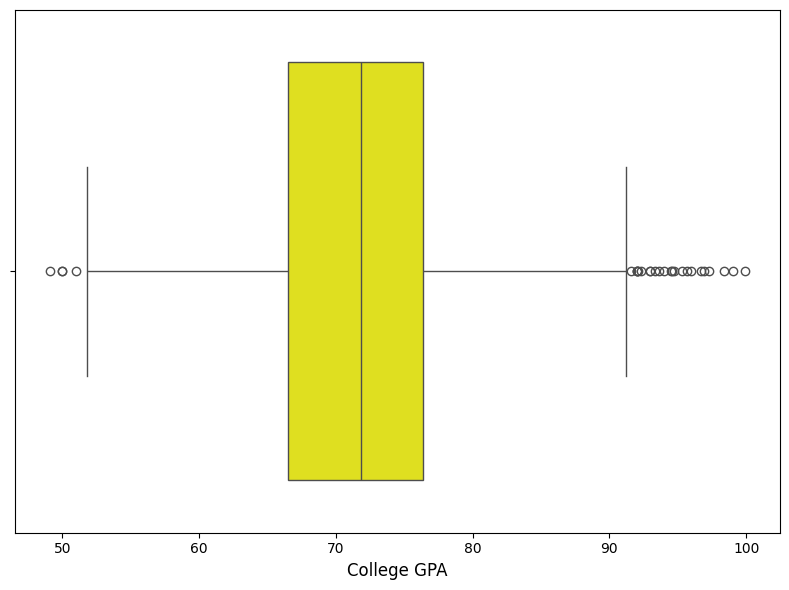

In [564]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['collegeGPA'], color='yellow')
plt.xlabel('College GPA', fontsize=12)
plt.tight_layout()
plt.show()

**Statistical Summary for the numerical columns**

In [565]:
numerical_columns = ['English', 'Logical', 'Quant', 'Domain' , 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'Age']

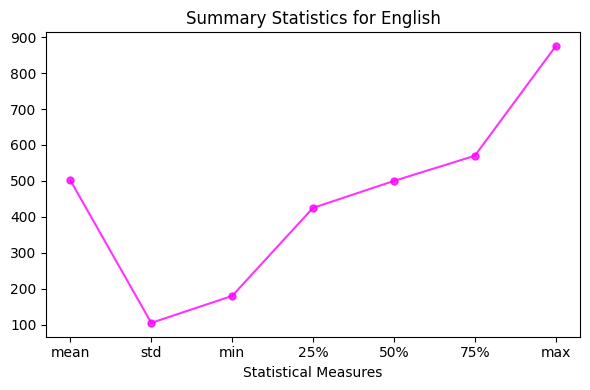

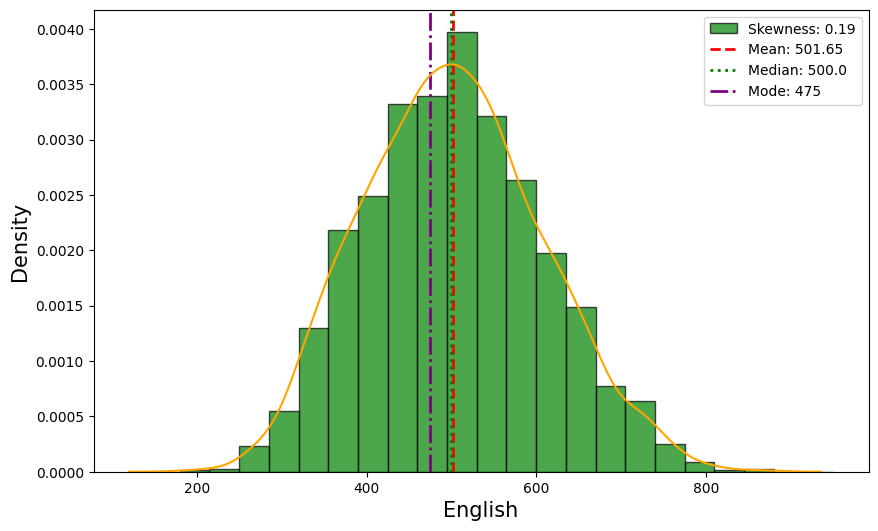

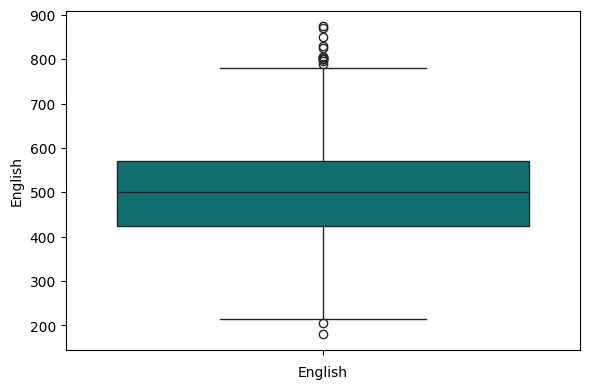

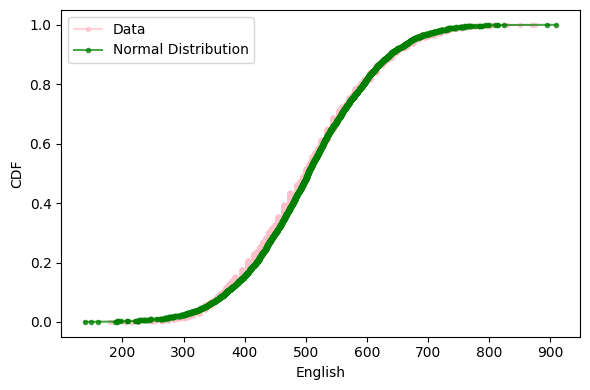

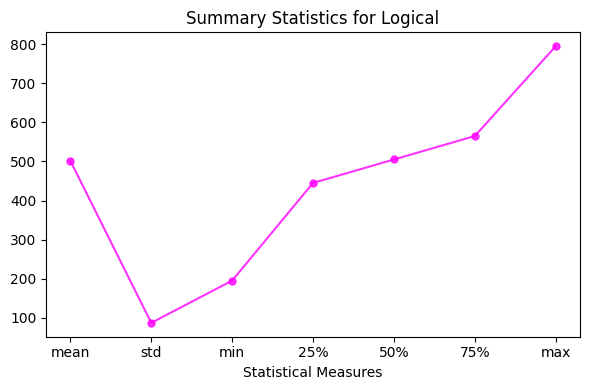

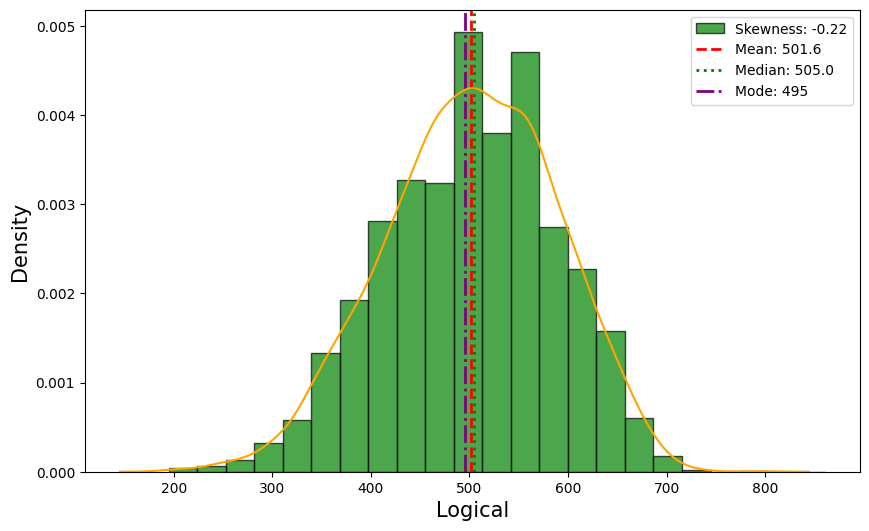

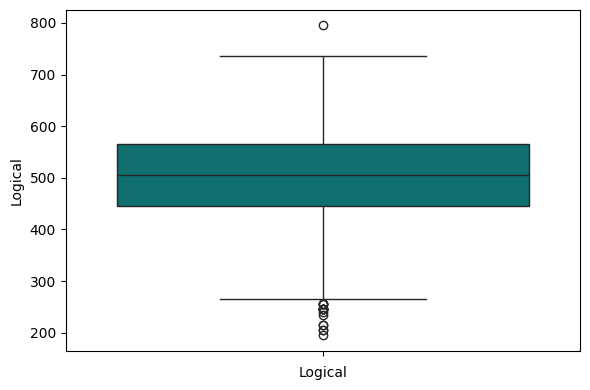

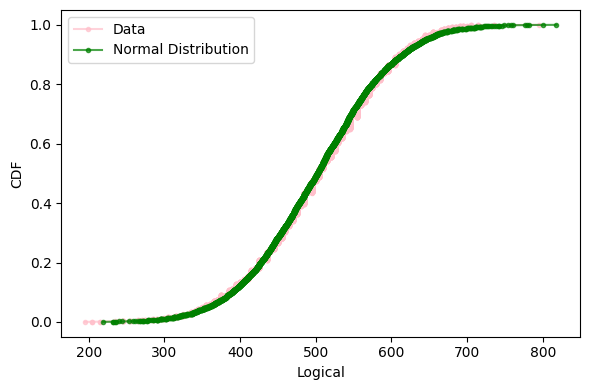

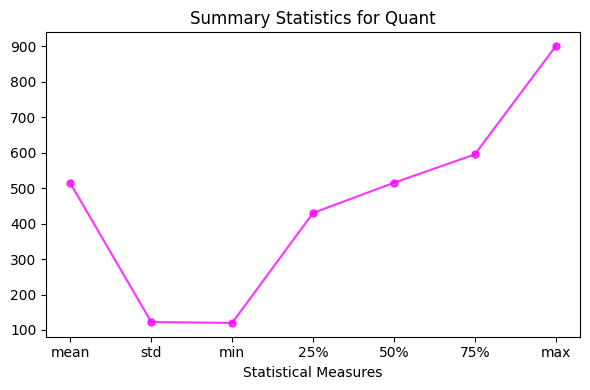

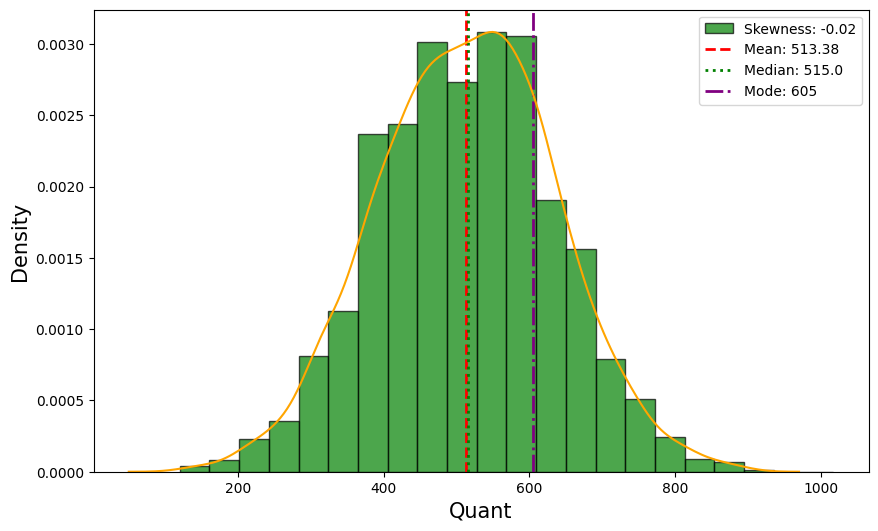

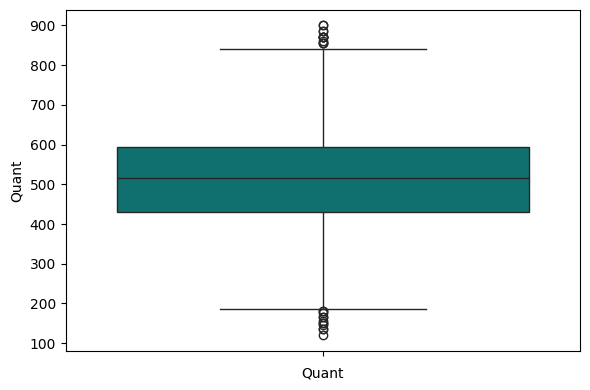

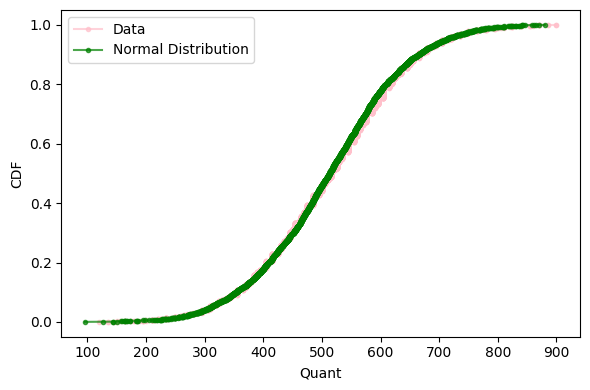

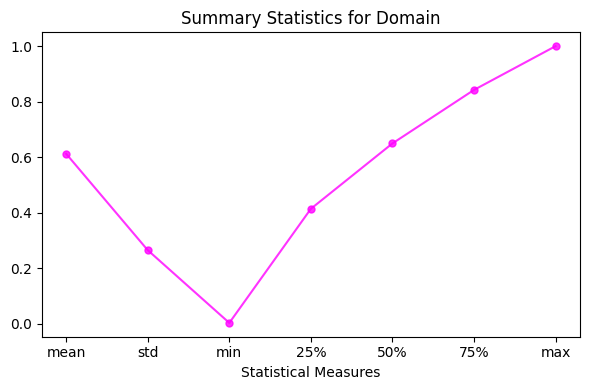

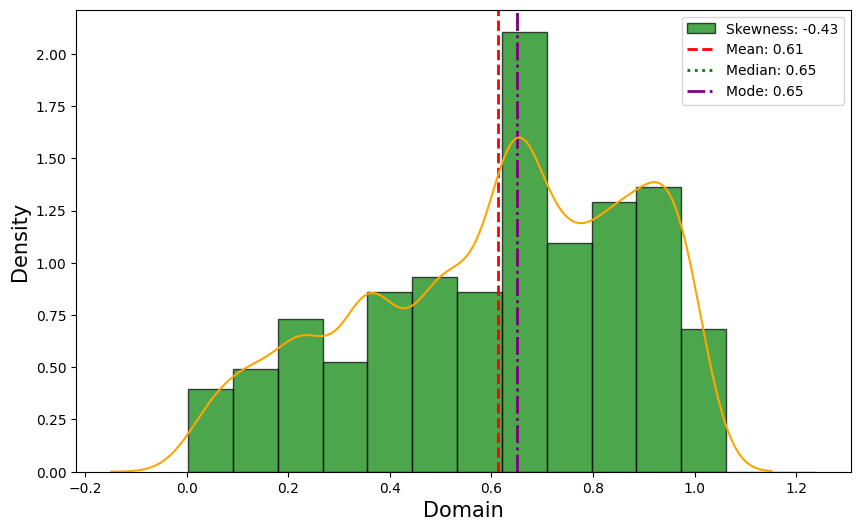

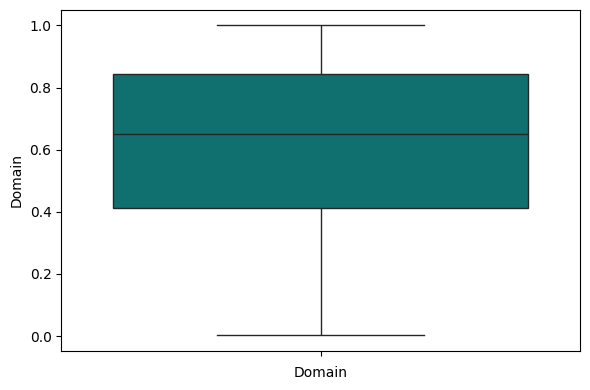

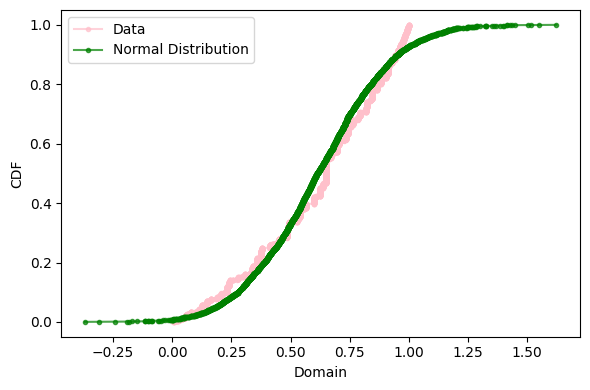

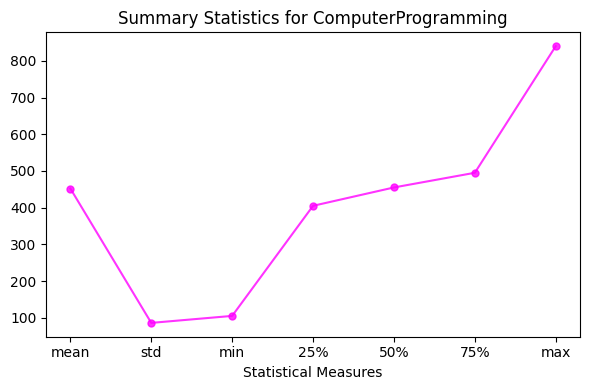

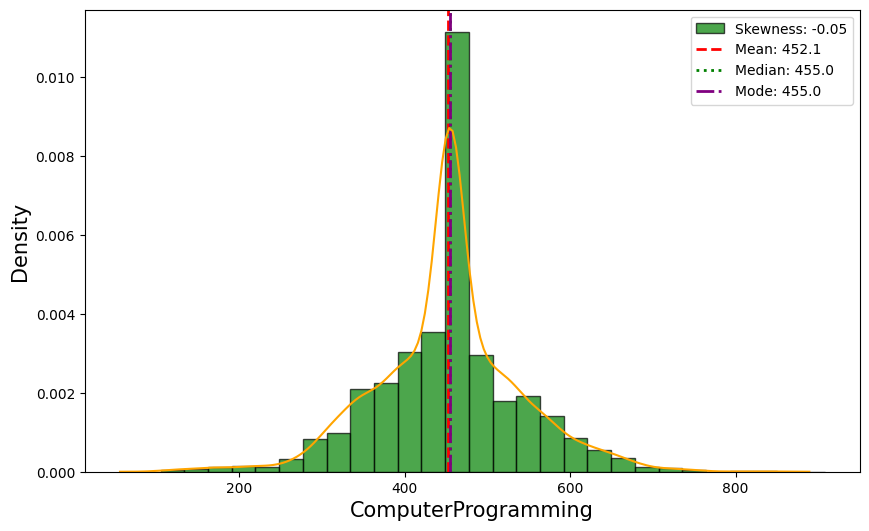

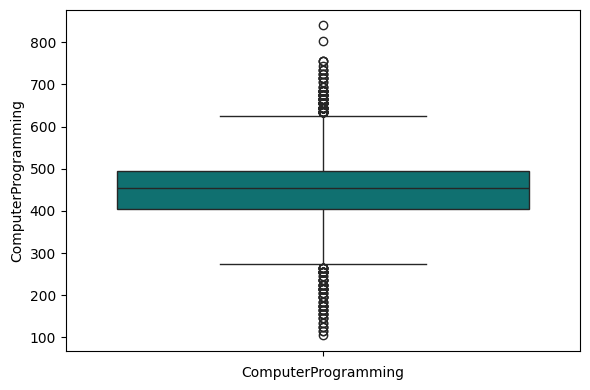

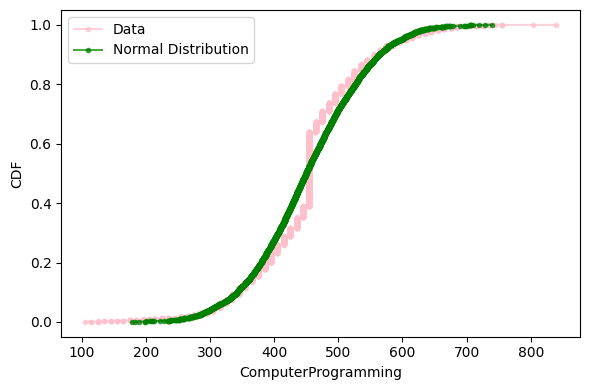

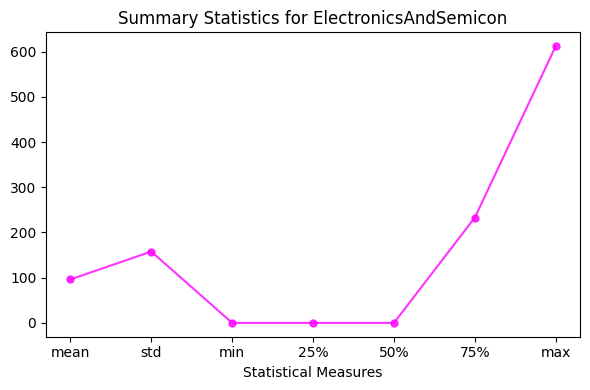

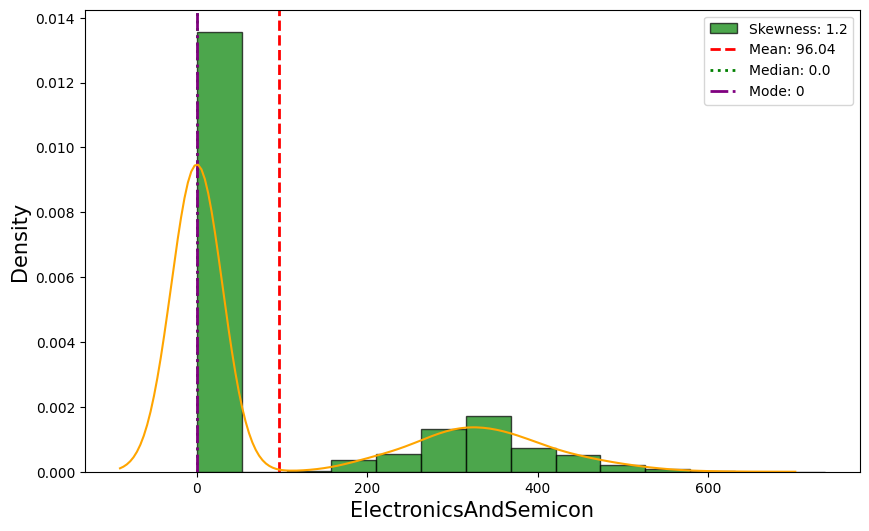

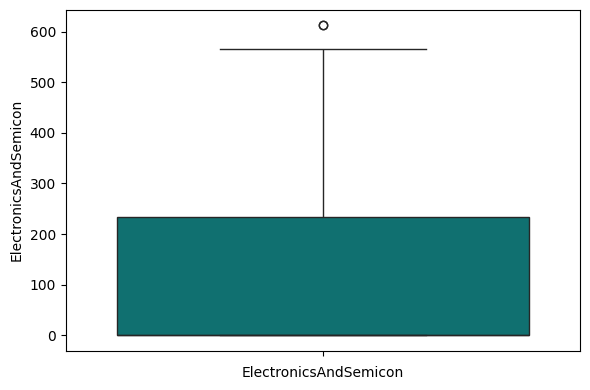

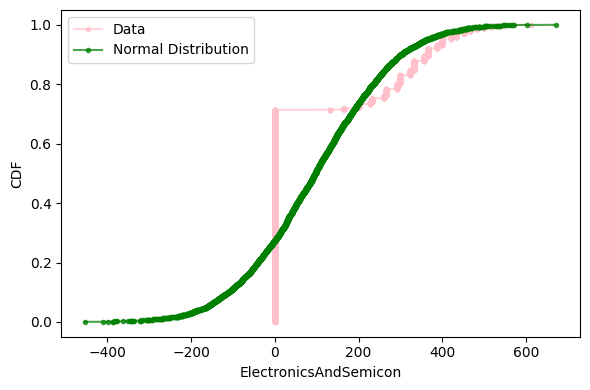

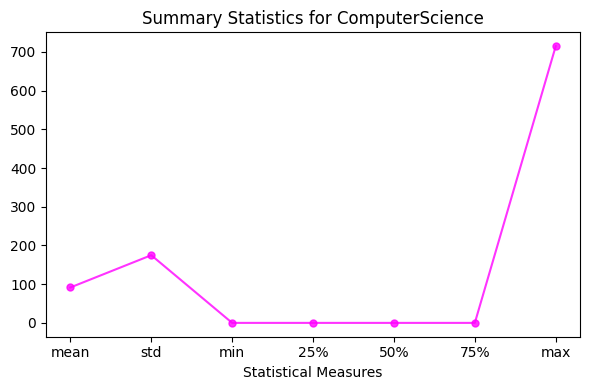

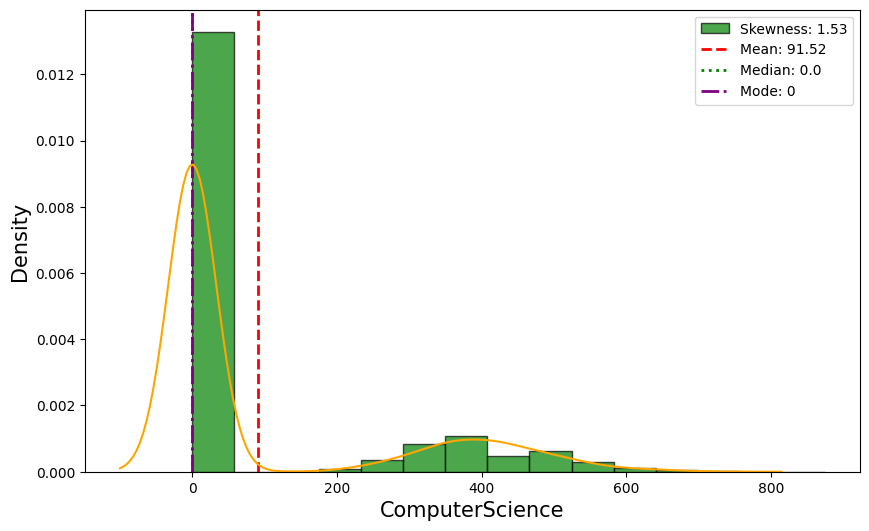

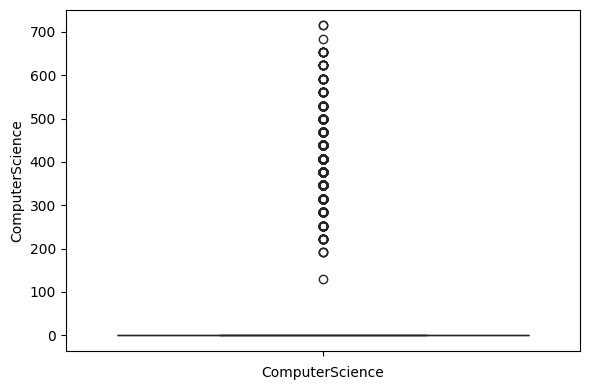

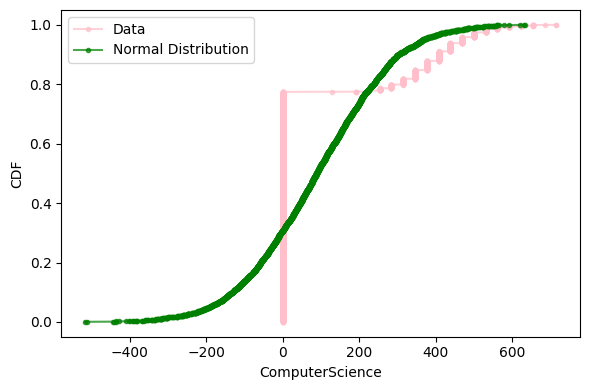

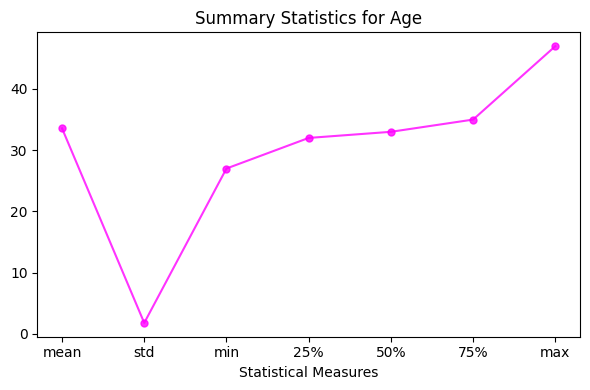

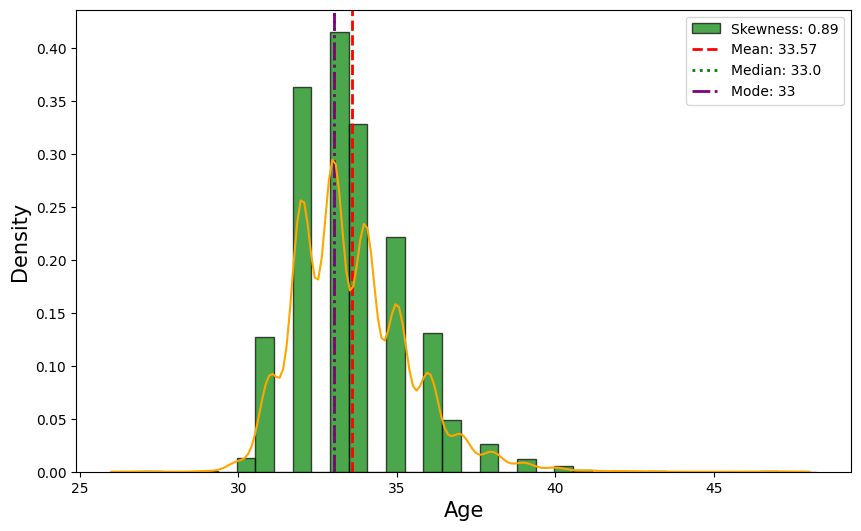

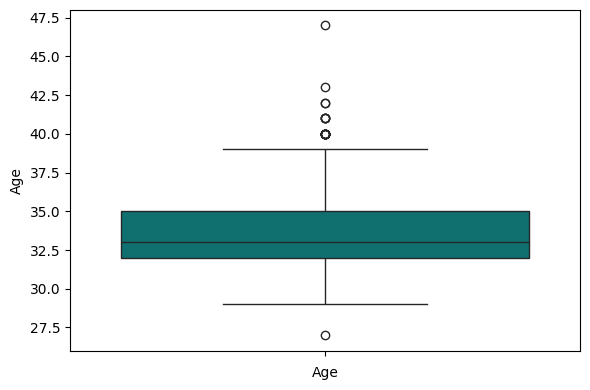

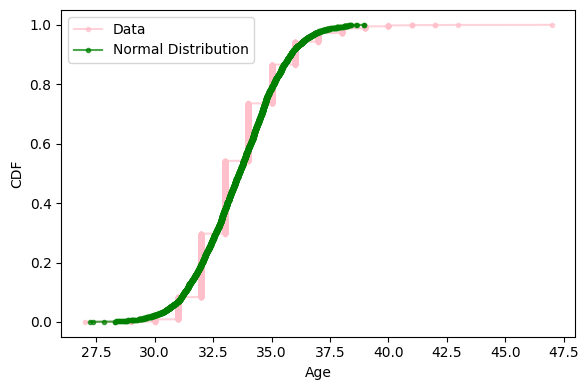

In [566]:
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

for column in numerical_columns:
    #Summary Statistics
    plt.figure(figsize=(6, 4))
    df[column].describe()[1:].plot(alpha=0.8, marker='o', markersize=5, color='magenta')
    plt.title(f'Summary Statistics for {column}')
    plt.xlabel('Statistical Measures')
    plt.tight_layout()
    plt.show()

    # Histogram
    bins = np.arange(df[column].min(), df[column].max() + df[column].std(), df[column].std() / 3)
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, ec='k', alpha=0.7, density=True, color='green', label=f"Skewness: {round(df[column].skew(), 2)}")
    plt.xlabel(column, size=15)
    plt.ylabel('Density', size=15)
    plt.axvline(df[column].mean(), linestyle='--', color='red', linewidth=2, label=f"Mean: {round(df[column].mean(), 2)}")
    plt.axvline(df[column].median(), linestyle=':', color='green', linewidth=2, label=f"Median: {round(df[column].median(), 2)}")
    plt.axvline(df[column].mode()[0], linestyle='-.', color='purple', linewidth=2, label=f"Mode: {round(df[column].mode()[0], 2)}")
    sns.kdeplot(df[column], color='orange')
    plt.legend()
    plt.show()

    # Box Plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column], color='teal')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

    # CDF Plot
    x_data, y_data = cdf(df[column])
    x_normal, y_normal = cdf(np.random.normal(df[column].mean(), df[column].std(), size=len(df[column])))
    plt.figure(figsize=(6, 4))
    plt.plot(x_data, y_data, linestyle='-', marker='.', color='pink', alpha=0.7, label='Data')
    plt.plot(x_normal, y_normal, linestyle='-', marker='.', color='green', alpha=0.7, label='Normal Distribution')
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Observations :**

* English Performance Analysis:

1. Overview: Approximately 50% of students achieved scores below 500 on their English assessments.
2. Distribution Insights: The concentration of scores predominantly ranged between 389 to 545, peaking at 475. The mean score was calculated to be 502.
3. Extremes and Outliers: The data reveals both low and high outliers, suggesting a variation in student capabilities.
4. Distribution Pattern: The cumulative distribution function indicates a pattern close to a normal distribution, which is typical for large student samples.

* Logical Reasoning Performance:

1. Summary: Half of the students recorded scores below 500 in logical reasoning tests.
2. Score Distribution: Scores were mostly distributed between 454 and 584, with the highest frequency at 495 and an average score of 502.
3. Outlier Analysis: The presence of a notable high extreme value alongside lower outliers suggests diversity in problem-solving skills.
4. Normality: The data closely approximates a normal distribution, which is indicative of standardized test scoring.

* Quantitative Ability Performance:

1. Overview: 75% of students scored below 600 in quantitative assessments.
2. Histogram Analysis: The scores largely fell within the 425-608 range, with a significant peak at 605 and an average of 513.
3. Box Plot Observations: Both lower and upper extreme values are visible, indicating a wide range of mathematical skills among students.
4. Distribution Pattern: The cumulative distribution function suggests the data is nearly normally distributed.

* Computer Programming Skills:

1. Summary: Fifty percent of the students achieved scores below 500 in computer programming.
2. Score Distribution: Most scores ranged from 416 to 459, with a modal peak at 455 and an average score of 452.
3. Box Plot Findings: The plot displays numerous low extreme values and several high extremes, reflecting varied proficiency levels.
4. Distribution Normality: The data does not follow a normal distribution pattern, suggesting an uneven spread of programming skills.

* Electronics & Semiconductors Performance:

1. Overview: Around 75% of students scored below 250 in this subject.
2. Distribution Analysis: Scores predominantly ranged from 0 to 79, with the majority achieving a score of 0 and a mean score of 96.
3. Median Representation: The median coincides with the minimum score, underscoring the challenging nature of the subject.
4. Distribution Pattern: The lack of a normal distribution pattern suggests significant difficulties faced by the majority in this area.

* Age Distribution of Students:

1. Demographic Overview: Seventy-five percent of the students are under the age of 26.
2. Age Spread: The majority of students are aged between 22 and 25, with the average, median, and mode age around 25.
3. Outlier Details: The box plot identifies several individuals significantly older or younger than the typical student.
4. Distribution Analysis: The age data does not exhibit a normal distribution, highlighting the diversity in student demographics.


# Bivariate Analysis

# Numerical vs Numerical Features

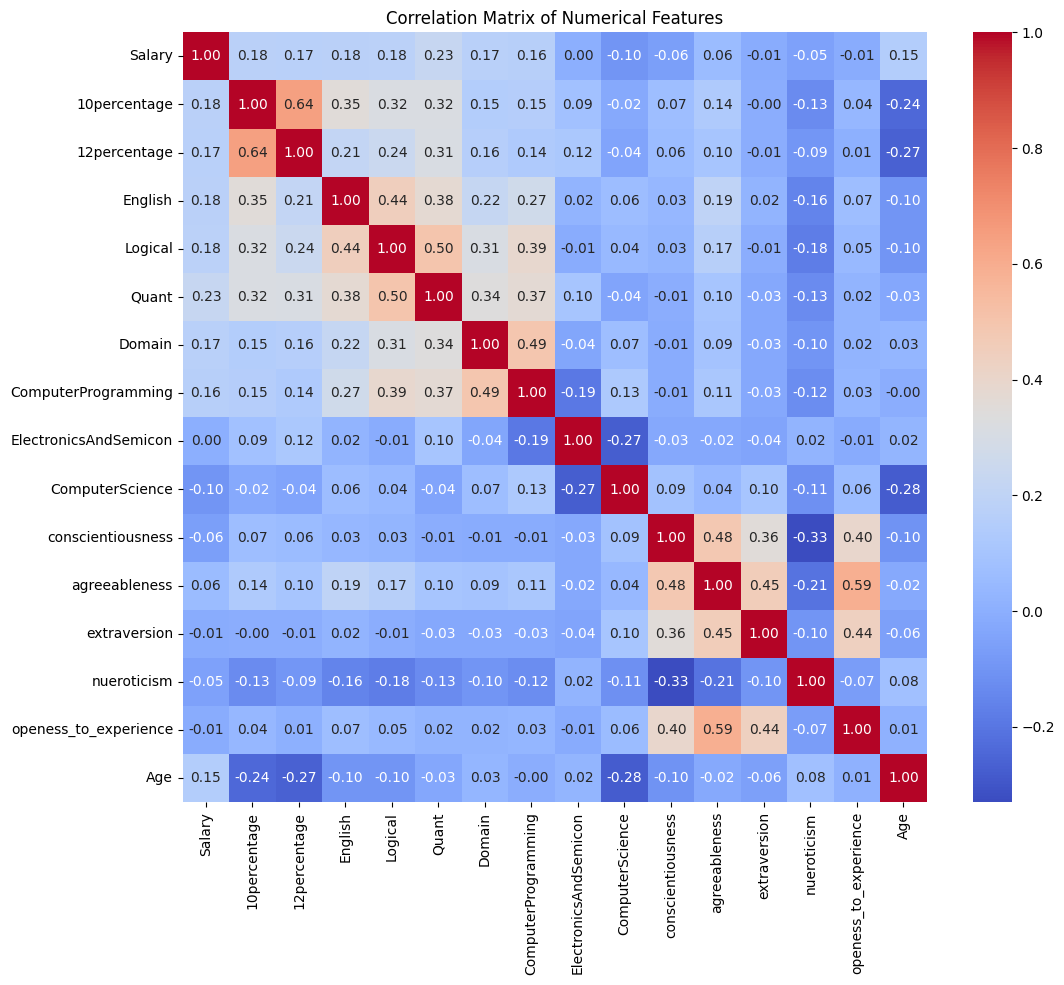

In [567]:
correlation_matrix = df[num_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Salary vs 10percentage**

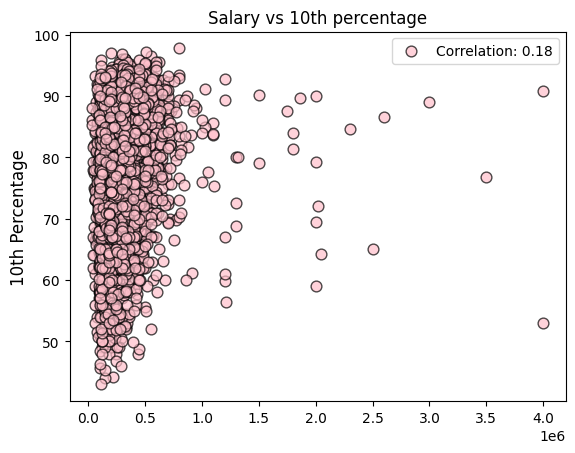

In [568]:
plt.scatter(df['Salary'], df['10percentage'], ec='black', color='pink', alpha=0.7, s=60,
               label=f"Correlation: {round(df[['Salary','10percentage']].corr().iloc[1,0],2)}")
plt.ylabel('10th Percentage', fontsize=12)
plt.title('Salary vs 10th percentage', fontsize=12)
plt.legend(fontsize=10);

There is no correlation between Salary and the 10th percentage

**Salary vs 12percentage**

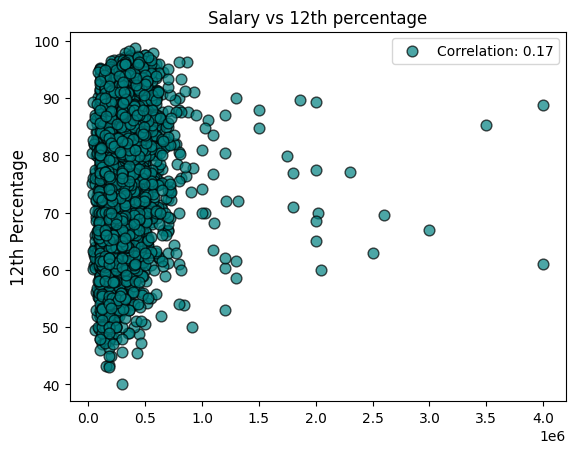

In [569]:
plt.scatter(df['Salary'], df['12percentage'], ec='black', color='teal', alpha=0.7, s=60,
               label=f"Correlation: {round(df[['Salary','12percentage']].corr().iloc[1,0],2)}")
plt.ylabel('12th Percentage', fontsize=12)
plt.title('Salary vs 12th percentage', fontsize=12)
plt.legend(fontsize=10);

There is no correlation between the Salary earned by the employees and the 10th and 12th percentages obtained

**Salary vs collegeGPA**

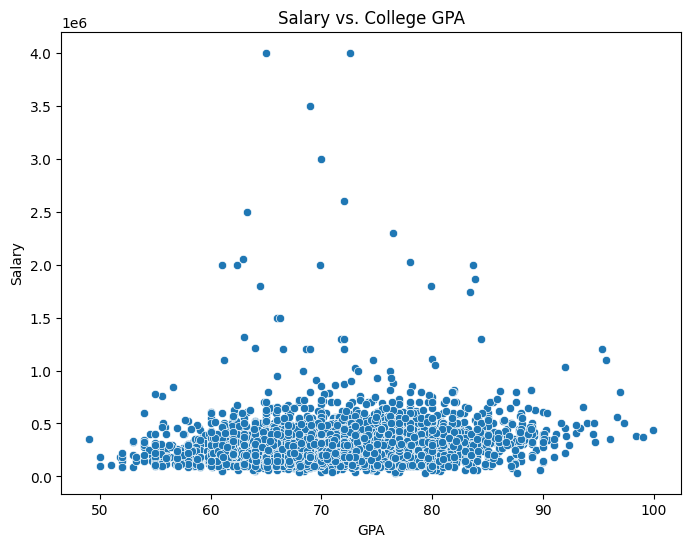

In [570]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('Salary vs. College GPA')
plt.xlabel('GPA')
plt.ylabel('Salary')
plt.show()

College GPA does not impact the salary earned by the employees

**Salary vs Age**

Text(0.5, 1.0, 'Salary vs Age')

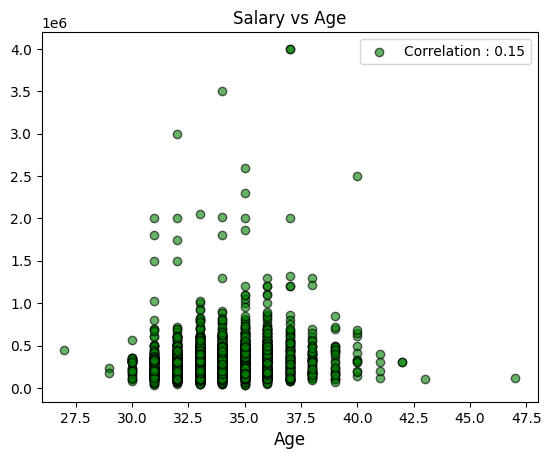

In [571]:
plt.scatter(df['Age'], df['Salary'], ec='black', color='green', alpha=0.6,
              label=f"Correlation : {round(df[['Age','Salary']].corr().iloc[1,0],2)}")
plt.legend(fontsize=10)
plt.xlabel('Age', fontsize=12)
plt.title('Salary vs Age', size=12)

There is no relation between Age of the Employees and the compensation they get

In [572]:
columns = ['English', 'Logical', 'Quant']
colors = ['teal', 'orange', 'red']

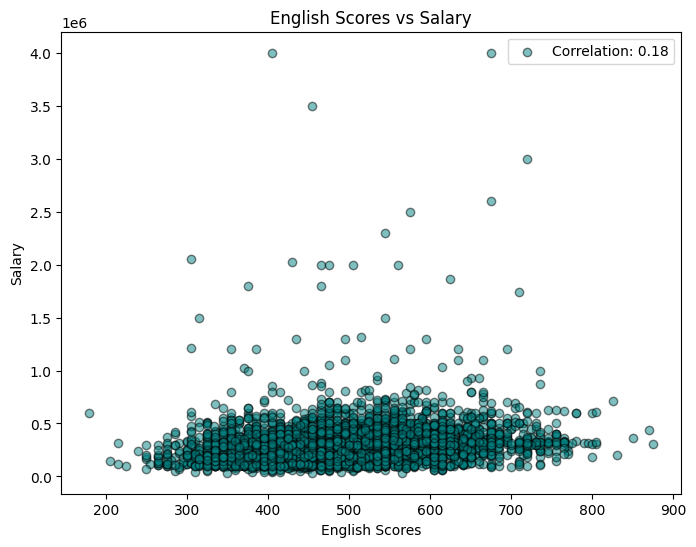

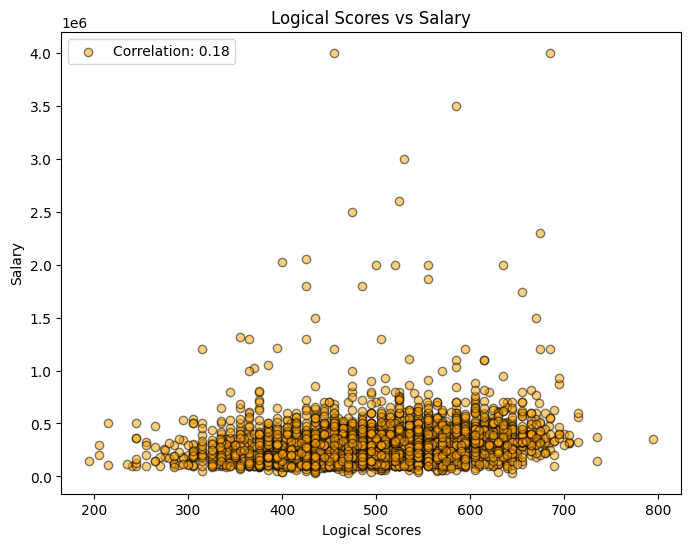

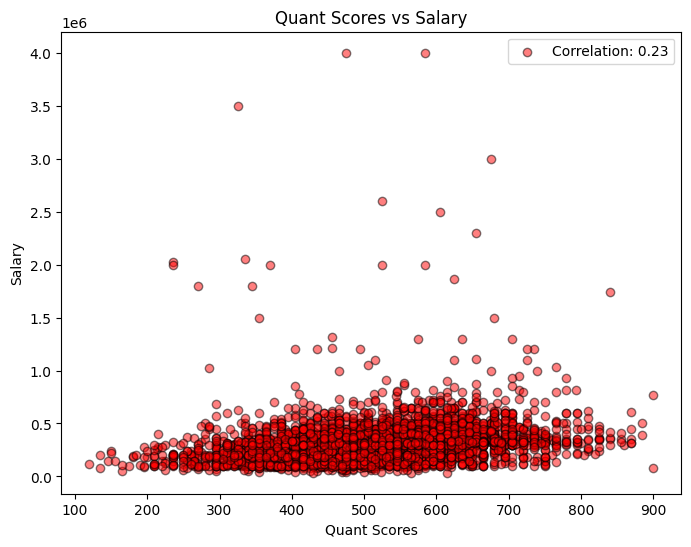

In [600]:
for i, col in enumerate(columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df['Salary'], ec='black', color=colors[i], alpha=0.5,
                label=f"Correlation: {round(df[[col,'Salary']].corr().iloc[0, 1], 2)}")
    plt.ylabel('Salary')
    plt.xlabel(f'{col} Scores')
    plt.title(f'{col} Scores vs Salary')
    plt.legend()
    plt.show()

It is evident that the scores on AMCAT Test does not directly impact the salary

# Categorical vs Numerical Features

**Salary vs Designation**

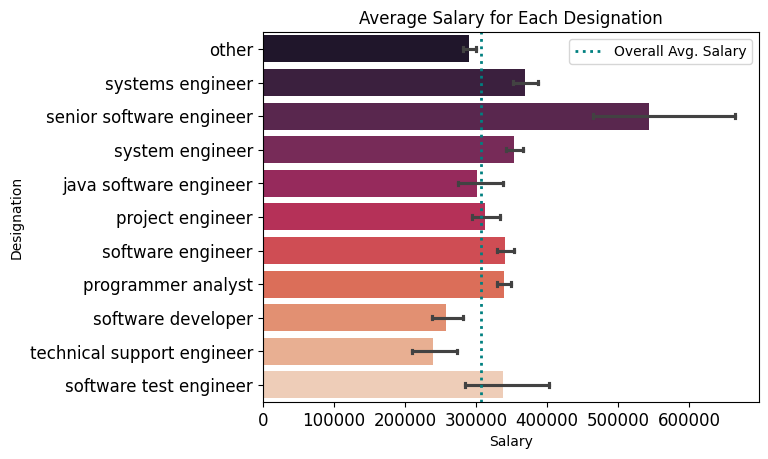

In [574]:
sns.barplot(x='Salary', y='Designation', data=df, capsize=0.1, palette='rocket')
plt.axvline(df['Salary'].mean(), color='teal', linestyle=':', linewidth=2, label='Overall Avg. Salary')
plt.title('Average Salary for Each Designation')
plt.legend()
plt.xlabel('Salary')
plt.tick_params(axis='both', labelsize=12)

Senior Software Engineers earn the highest followed by System Engineers

**Salary vs Gender**

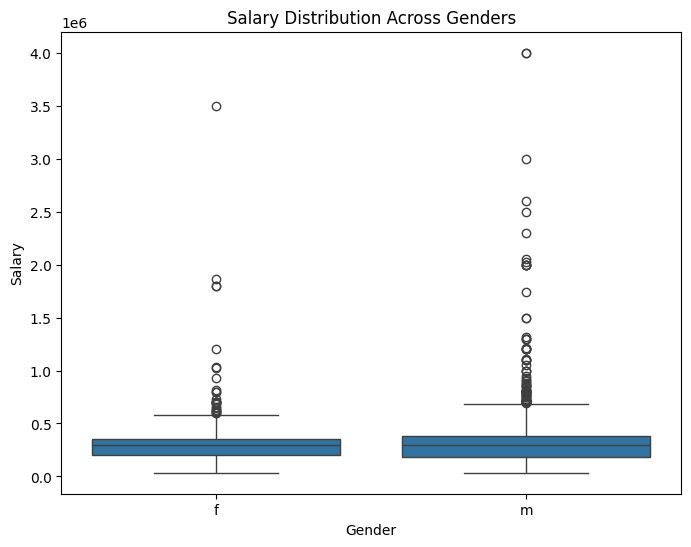

In [575]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

There is a slight difference between the wages earned by the women and men with the spread of Men's salary being higher.

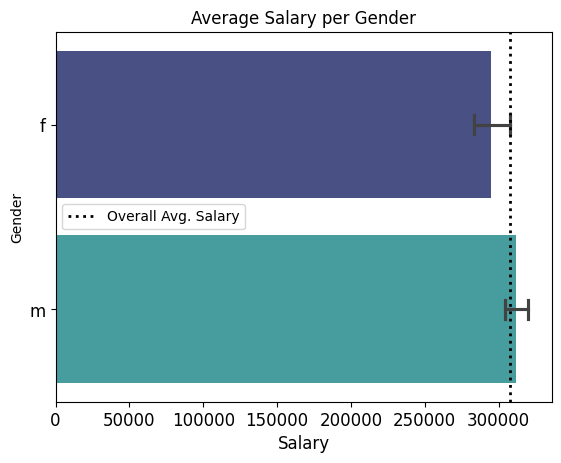

In [576]:
sns.barplot(x='Salary', y='Gender', data=df, palette='mako', capsize=0.1)
plt.axvline(df['Salary'].mean(), color='black', linestyle=':', linewidth=2, label='Overall Avg. Salary')
plt.title('Average Salary per Gender')
plt.legend()
plt.xlabel('Salary', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

The overall average salary for Female workers is less when compared to the male employees

**Salary vs Degree**

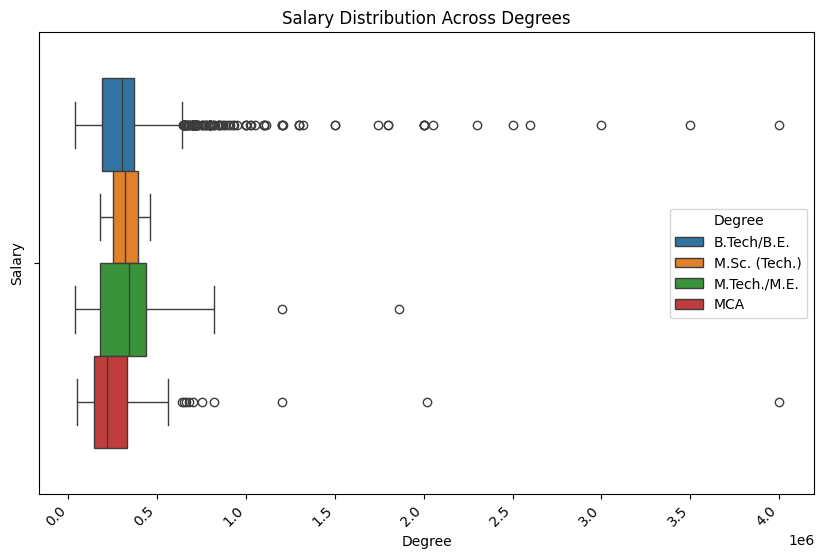

In [578]:
plt.figure(figsize=(10, 6))
sns.boxplot( x='Salary', data=df,hue ='Degree')
plt.title('Salary Distribution Across Degrees')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**
1. The employees who hold a degree in Bachelor of Engineering or Bachelor of Technology earn higher than the others.
2. The second high paid degree is MCA

**Gender vs Specialization**

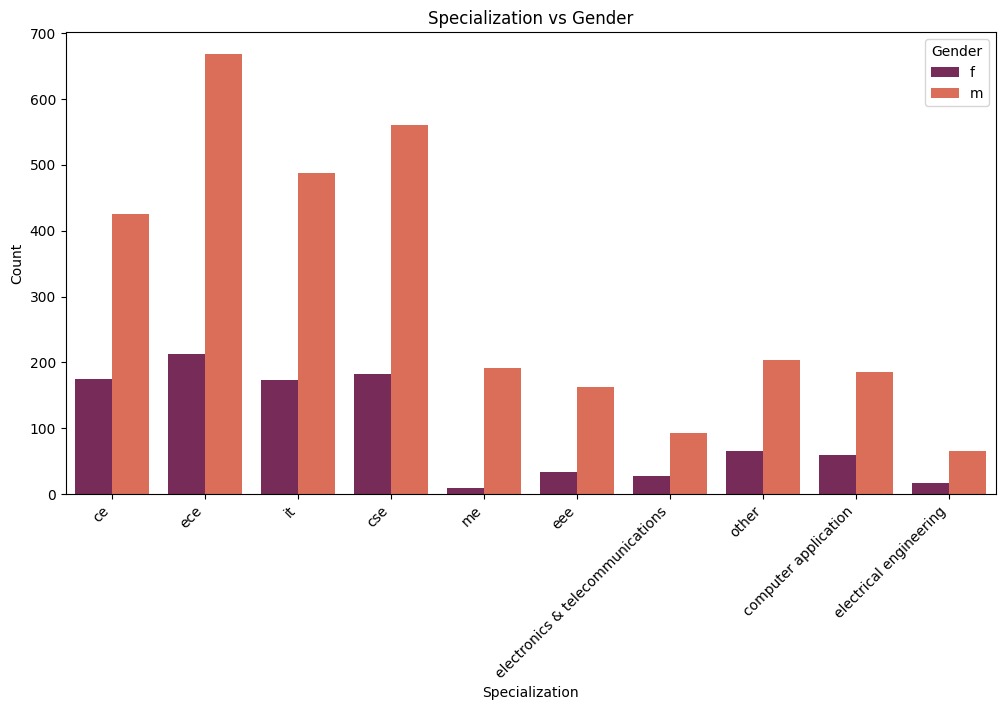

In [579]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Specialization', hue='Gender', data=df, palette = 'rocket')
plt.title('Specialization vs Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**
1. The amount of male employees is significantly higher than the female workers.
2. For both the genders, ECE is the most popular Specialization.
3. Mechanical Engineering has the least number of female employees.

**Salary vs JobCity**

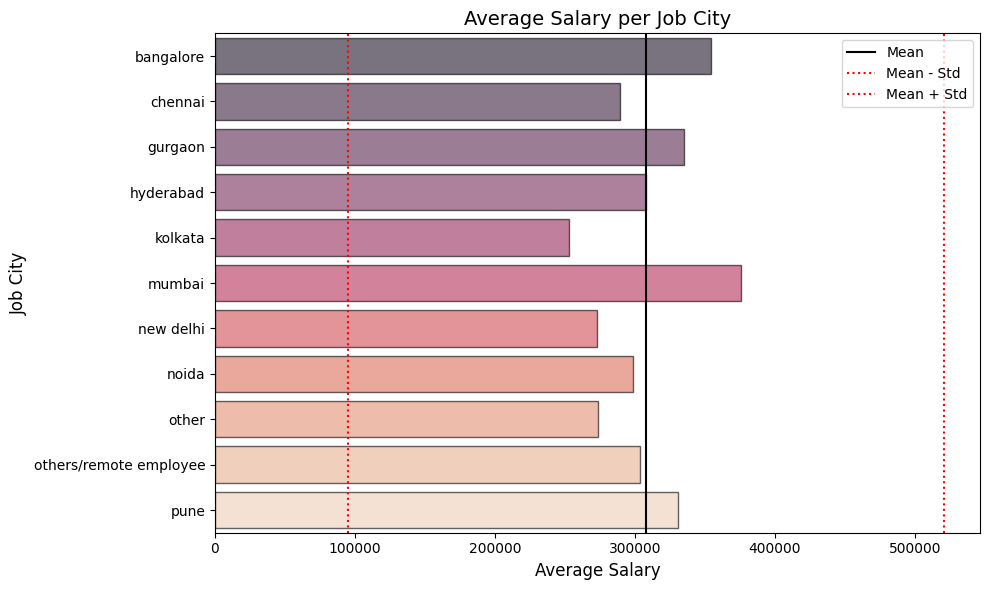

In [580]:
avg_salary_per_city = df.pivot_table(index='JobCity', values='Salary', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.barplot(x='Salary', y=avg_salary_per_city.index, data=avg_salary_per_city, palette='rocket', edgecolor='k', alpha=0.6)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Job City', fontsize=12)
plt.title('Average Salary per Job City', fontsize=14)
mean_salary = df['Salary'].mean()
std_salary = df['Salary'].std()
plt.axvline(mean_salary, color='k', linestyle='-', label='Mean')
plt.axvline(mean_salary - std_salary, color='red', linestyle=':', label='Mean - Std')
plt.axvline(mean_salary + std_salary, color='red', linestyle=':', label='Mean + Std')

plt.legend()
plt.tight_layout()
plt.show()

**Onservations:**
1. The highest average salary offered is in Mumbai followed by Bangalore.
2. Kolkata has least average salary, less number of jobs available in the city can be contributing factor.

**Salary vs CollegeTier**

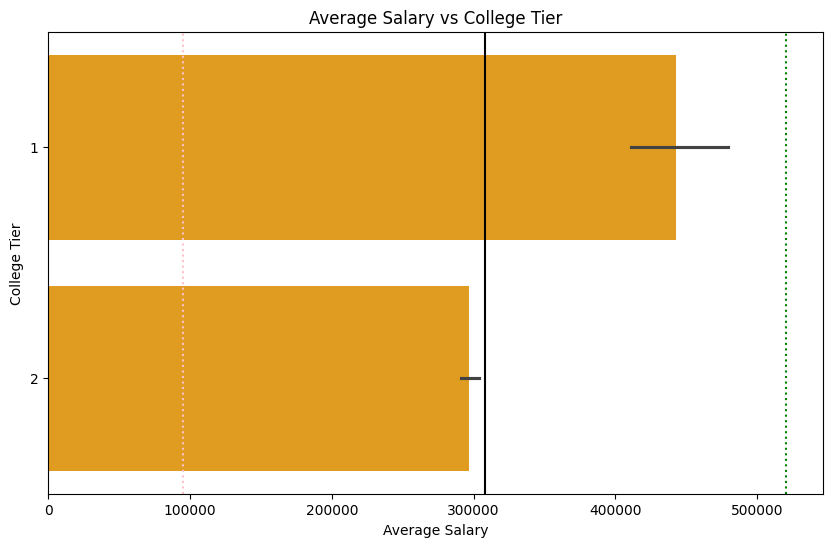

In [581]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary', y='CollegeTier', data=df, orient='h', color = 'orange')
plt.title('Average Salary vs College Tier')
plt.xlabel('Average Salary')
plt.ylabel('College Tier')
mean_salary = df['Salary'].mean()
std_salary = df['Salary'].std()
plt.axvline(mean_salary, color='k', linestyle='-', label='Mean')
plt.axvline(mean_salary - std_salary, color='pink', linestyle=':', label='Mean - Std')
plt.axvline(mean_salary + std_salary, color='green', linestyle=':', label='Mean + Std')
plt.show()
plt.show()

Employees who graduated from Tier 1 earn significantly higher than those from Tier 2

# **Research Questions**

Q1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [582]:
df['Designation'].value_counts()

,count
Designation,
other,2296
software engineer,539
software developer,265
system engineer,205
programmer analyst,139
systems engineer,118
java software engineer,111
software test engineer,100
project engineer,77


First, we must clean the data to get the appropriate Designations

In [583]:
df['Designation'] = df['Designation'].replace(['java software engineer', 'software engineer'], 'software engineer')

In [584]:
df['Designation'].value_counts()

,count
Designation,
other,2296
software engineer,650
software developer,265
system engineer,205
programmer analyst,139
systems engineer,118
software test engineer,100
project engineer,77
technical support engineer,76


In [585]:
df['Specialization'].value_counts()

,count
Specialization,
ece,880
cse,744
it,660
ce,600
other,270
computer application,244
me,201
eee,196
electronics & telecommunications,121


In [586]:
desig_df= df[(df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
        (df["Specialization"].isin(['cse', 'ce']))]

In [587]:
desig_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobCities
6,300000.0,2014-08-01,5/1/15 0:00,software engineer,other,m,1993-02-01,86.08,state board,2010,...,405.0,0,346,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,31,Bangalore
19,325000.0,2014-09-01,present,software engineer,pune,f,1990-11-30,79.00,cbse,2008,...,525.0,0,0,0.8192,0.2668,-0.2714,-0.4078,-0.1295,34,Pune
20,320000.0,2010-11-01,9/1/12 0:00,software engineer,bangalore,f,1988-07-25,91.20,other,2006,...,445.0,0,0,-0.1082,0.9688,0.5269,-0.2902,0.3444,36,Bangalore
24,335000.0,2014-06-01,6/1/15 0:00,programmer analyst,hyderabad,m,1993-06-28,88.00,state board,2010,...,475.0,0,346,0.4155,0.8027,0.1357,-0.9950,-0.6692,31,Hyderabad
31,340000.0,2014-08-01,4/1/15 0:00,software engineer,bangalore,m,1992-10-23,77.20,state board,2010,...,485.0,0,407,-0.0154,1.2114,1.0859,-1.5021,0.2889,32,Bangalore


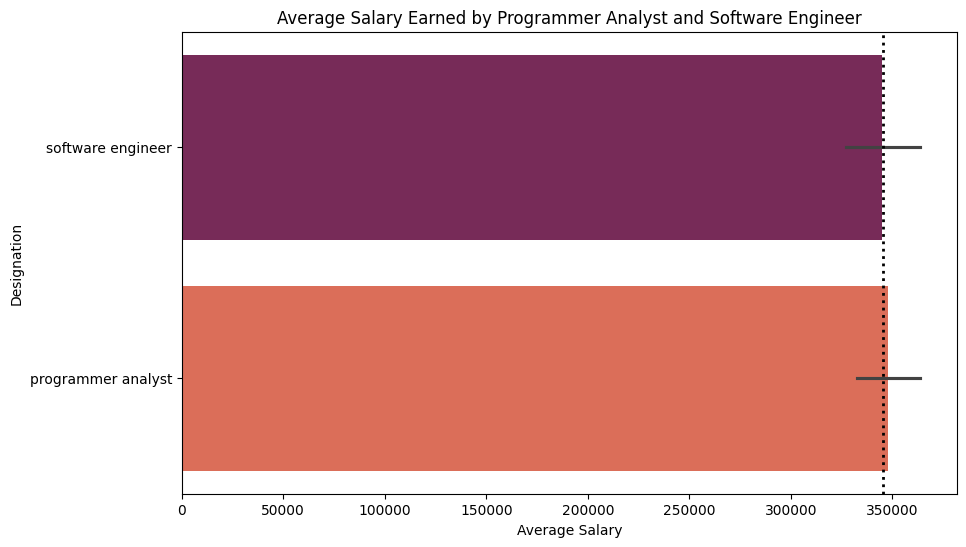

In [588]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Designation', x='Salary', data=desig_df, orient='h', estimator=np.mean, palette ='rocket')
plt.title('Average Salary Earned by Programmer Analyst and Software Engineer')
plt.ylabel('Designation')
plt.xlabel('Average Salary')
plt.axvline(desig_df['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
plt.show()

Let us draw a sample from the dataset to run a statistical test

In [589]:
import random
from scipy.stats import t,norm
import statistics
n = 50
salary_random = random.sample(desig_df['Salary'].tolist(),n)
print(salary_random)

[1500000.0, 180000.0, 410000.0, 120000.0, 420000.0, 305000.0, 490000.0, 515000.0, 500000.0, 345000.0, 405000.0, 230000.0, 150000.0, 300000.0, 330000.0, 300000.0, 330000.0, 315000.0, 300000.0, 350000.0, 335000.0, 310000.0, 180000.0, 240000.0, 350000.0, 200000.0, 190000.0, 300000.0, 450000.0, 350000.0, 450000.0, 380000.0, 225000.0, 315000.0, 405000.0, 305000.0, 120000.0, 300000.0, 220000.0, 410000.0, 300000.0, 400000.0, 480000.0, 95000.0, 340000.0, 300000.0, 335000.0, 400000.0, 1000000.0, 500000.0]


In [590]:
from scipy import stats
stat, p_value = stats.shapiro(salary_random)
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 1.5688224336299552e-09


AS p-value > 0.05, the data is normally distributed, we can proceed with the t-test.

**One Sample t-test**

* Null Hypothesis (H0): The average salary of fresh graduates in Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer roles is ₹2.75 lakhs.

* Alternative Hypothesis (H1): The average salary of fresh graduates in these roles is significantly different from ₹2.75 lakhs.

This will be a two-tailed test since we must check whether the actual salary is significantly different from ₹2.75 lakhs, either higher or lower.

In [591]:
t_stat, t_test_p_value = stats.ttest_1samp(salary_random, 275000)
print(f"t-statistic: {t_stat}, p-value: {t_test_p_value}")

t-statistic: 2.763615869342021, p-value: 0.008030843099690977


With a t-statistic of 2.84 and a p-value of 0.0066, we have strong evidence to reject the null hypothesis that the average salary for fresh graduates in roles such as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer is ₹2.75 lakhs (within the range of ₹2.5 to ₹3 lakhs).

**Conclusion:**

The p-value of 0.0080 is much smaller than the significance level of 0.05.
Thus, the claim from the Times of India article dated Jan 18, 2019, that fresh graduates in these roles earn ₹2.5 to ₹3 lakhs does not hold true for the dataset.

In [592]:
actual_avg_salary = desig_df['Salary'].mean()

print(f"The actual average salary for the selected professionals is: ₹{actual_avg_salary:.2f}")

The actual average salary for the selected professionals is: ₹345431.03


Both Programmer Analyst and Software Engineer positions show significantly higher salaries compared to the expected lower bound of the salary range (2.5-3 lakhs)

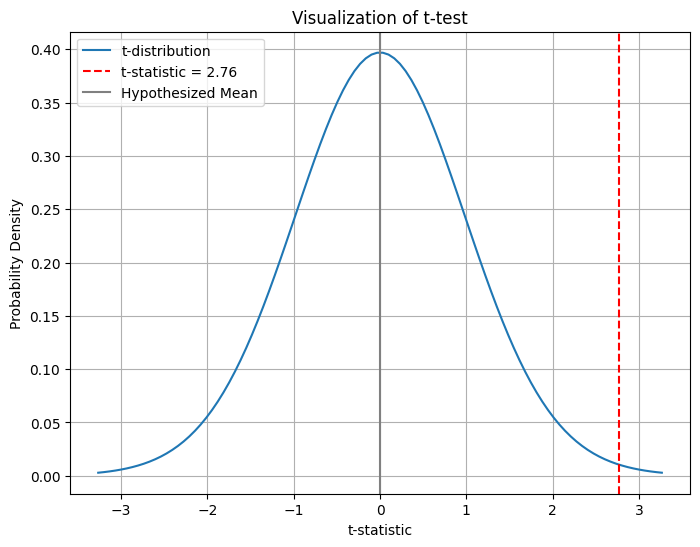

In [593]:
from scipy.stats import t

sample_mean = np.mean(salary_random)
hypothesized_mean = 275000
degrees_of_freedom = len(salary_random) - 1
x = np.linspace(t.ppf(0.001, degrees_of_freedom), t.ppf(0.999, degrees_of_freedom), 100)

# Calculating the probability density function (PDF) for the t-distribution
pdf = t.pdf(x, degrees_of_freedom)


# Creating the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='t-distribution')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.title('Visualization of t-test')
plt.axvline(t_stat, color='red', linestyle='--', label=f't-statistic = {t_stat:.2f}')


# Add a vertical line for the hypothesized mean
plt.axvline(0, color='gray', linestyle='-', label='Hypothesized Mean')
plt.legend()
plt.grid(True)
plt.show()

Q2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [597]:
# Null Hypothesis (Ho): There is no association between the variables. The variables are independent.
# Alternative Hypothesis (H1): There is an association between the variables. The variables are not independent.

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")


# Interpreting the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a statistically significant relationship between gender and specialization.")
else:
    print("There is no statistically significant relationship between gender and specialization.")


Chi-square statistic: 55.99767414174243
P-value: 7.857419007212732e-09
Degrees of freedom: 9
There is a statistically significant relationship between gender and specialization.


**Conclusion:**
The p-value is much less than the typical significance level (0.05 or 5%), indicating that we should reject the null hypothesis. This suggests that there is a statistically significant relationship between gender and specialization.